**HUMAN VOICE DETECTION CLASSIFICATION MODEL**

For making this classification model, we need two datasets in audio format.



1.   Human audio
2.   other (non-human) audio datasets - urban noises, nature voices etc.



**We will be using following datasets :**

A. Human Audio Datasets
  1. Ljspeech
  2. Hindi Audiobooks
  3. Hindi audiospeech
  4. speech emotions english
  5. maxican emotional speech

<br>
<br>
  
B. Other (non-human) Datasets
  1. Urban sound 8k
  2. Bird sound dataset

# loading the libraries

In [ ]:
### getting the dataset

!mkdir dataset

In [ ]:


# !cd dataset && wget "https://zenodo.org/api/records/3966543/files-archive"

!git lfs install
!cd dataset && git clone https://huggingface.co/datasets/MahiA/UrbanSound8K

mkdir: cannot create directory ‘dataset’: File exists
Git LFS initialized.
Cloning into 'UrbanSound8K'...
remote: Enumerating objects: 8792, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 8792 (delta 16), reused 2 (delta 2), pack-reused 8769 (from 1)
Receiving objects: 100% (8792/8792), 1.43 MiB | 14.68 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Updating files: 100% (8766/8766), done.
Filtering content: 100% (8732/8732), 6.60 GiB | 27.26 MiB/s, done.


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# Data Preprocessing

Note : Because some of the dataset are very huge, it is recommanded to process each of the dataset individually and save the librosa output dataset (which is significantly smaller) and later load all of them.

<br>
<br>

Also we are going to limit the audio length for each data point to 4 seconds. And for the speed required for classification task, we will keep the sample rate to 6K.

## Other sound dataset

In [ ]:
import librosa
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import time

def extract_features(file_path, sr=6000, n_mfcc=40, duration=4.0):
    try:
        # Load the audio with a lower sample rate to speed up processing
        audio, original_sr = librosa.load(file_path, sr=sr, duration=duration)

        # Compute MFCCs with fewer coefficients
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

        # Take the mean of each coefficient over time
        mfccs_mean = np.mean(mfccs, axis=1)

        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


# Function to extract features in multithreaded way for a list of audio file paths
def extract_features_multithreaded(audio_paths):
    features = []

    # Use ThreadPoolExecutor to process multiple audio files concurrently
    with ThreadPoolExecutor() as executor:
        # Use executor.map to apply extract_features concurrently to all audio paths
        results = executor.map(extract_features, audio_paths)

        # Collect non-None results
        for result in results:
            if result is not None:
                features.append(result)

    try:
      return np.array(features)
    except Exception as e:
      print(f"exception occured {e}")
      return features

### Urban sound 8k dataset

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv("/content/dataset/UrbanSound8K/csv_files/train.csv")
train_data.head()

classname                            path
0    engine idling    audios/fold4/16692-5-0-8.wav
1       jackhammer  audios/fold5/104998-7-14-1.wav
2       jackhammer   audios/fold1/180937-7-1-5.wav
3  air conditioner  audios/fold1/134717-0-0-24.wav
4         dog bark   audios/fold4/174026-3-1-1.wav

In [ ]:
test_data = pd.read_csv("/content/dataset/UrbanSound8K/csv_files/test.csv")
test_data.head()

classname                             path
0     street music  audios/fold10/117889-9-0-12.wav
1  air conditioner    audios/fold3/153261-0-0-1.wav
2         gun shot   audios/fold10/205013-6-0-0.wav
3     street music    audios/fold1/26270-9-0-35.wav
4         gun shot   audios/fold10/157207-6-8-0.wav

In [ ]:
train_data["classname"].unique()

array(['engine idling', 'jackhammer', 'air conditioner', 'dog bark',
       'car horn', 'drilling', 'children playing', 'siren',
       'street music', 'gun shot'], dtype=object)

In [ ]:
train_data[train_data["classname"]=="children playing"]

classname                             path
10    children playing  audios/fold7/207216-2-0-119.wav
18    children playing    audios/fold10/27070-2-0-4.wav
27    children playing    audios/fold2/196067-2-0-0.wav
47    children playing   audios/fold9/184449-2-0-19.wav
50    children playing   audios/fold8/133090-2-0-20.wav
...                ...                              ...
6916  children playing    audios/fold4/206037-2-0-4.wav
6933  children playing    audios/fold6/85249-2-0-10.wav
6937  children playing    audios/fold3/58857-2-0-25.wav
6966  children playing   audios/fold6/133494-2-0-18.wav
6984  children playing   audios/fold4/192382-2-0-18.wav

[800 rows x 2 columns]

In [ ]:
import os

In [ ]:
audio_root_path = "/content/dataset/UrbanSound8K/audios"

audio_fod_list = os.listdir(audio_root_path)

n = 0

for i in audio_fod_list:
  n+= len(os.listdir(os.path.join(audio_root_path, i)))

n

8742

In [ ]:
len(train_data)+ len(test_data), len(train_data), len(test_data)

(8732, 6985, 1747)

We will drop the children playing audios because they may interfere with the human datasets

In [ ]:
drop_audios = ["children playing"]


if len(drop_audios)>0:
  train_data = train_data[~train_data["classname"].isin(drop_audios)]
  test_data = test_data[~test_data["classname"].isin(drop_audios)]

In [ ]:
train_data['classname'].unique(), test_data['classname'].unique()

(array(['engine idling', 'jackhammer', 'air conditioner', 'dog bark',
        'car horn', 'drilling', 'siren', 'street music', 'gun shot'],
       dtype=object),
 array(['street music', 'air conditioner', 'gun shot', 'siren',
        'engine idling', 'drilling', 'dog bark', 'jackhammer', 'car horn'],
       dtype=object))

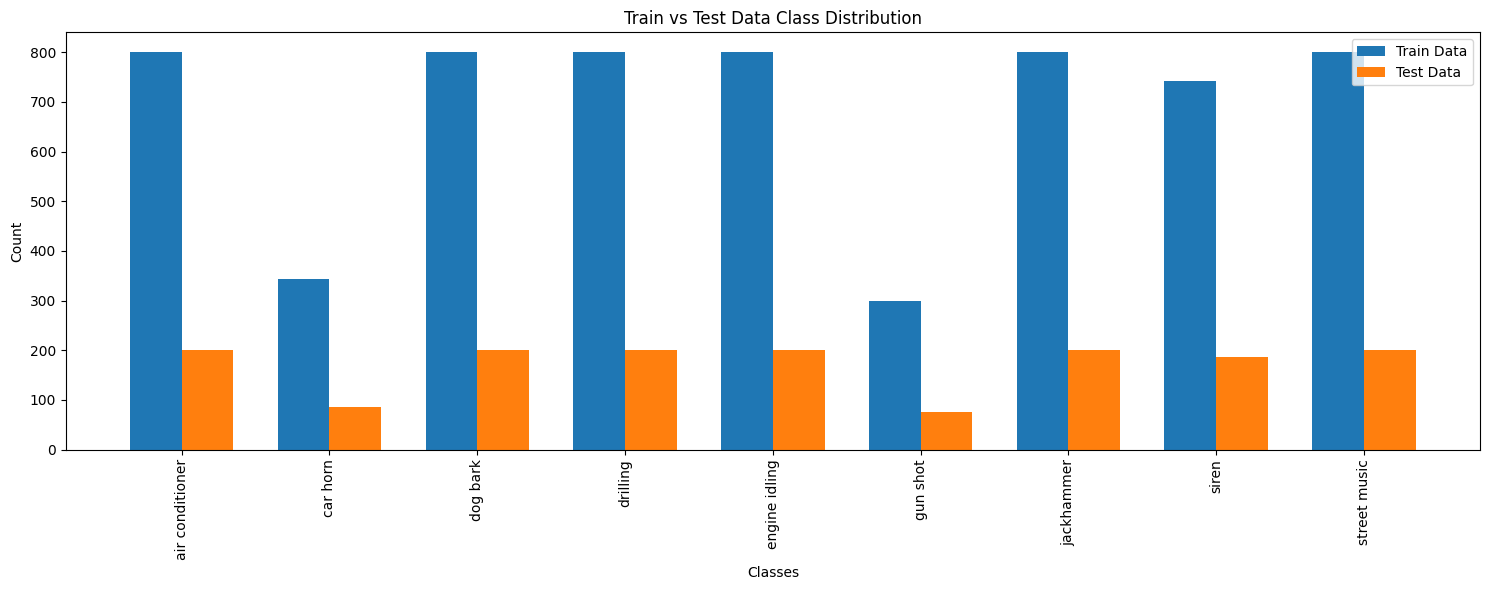

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get value counts for train and test data
train_counts = train_data['classname'].value_counts()
test_counts = test_data['classname'].value_counts()

# Combine both into a DataFrame to ensure they align
combined = pd.DataFrame({
    'Train': train_counts,
    'Test': test_counts
}).fillna(0)  # Fill NaNs with 0 for classes present in only one set

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))

# Set positions for the bars
bar_width = 0.35
index = np.arange(len(combined))

# Plot bars for both Train and Test Data
ax.bar(index - bar_width/2, combined['Train'], bar_width, label='Train Data')
ax.bar(index + bar_width/2, combined['Test'], bar_width, label='Test Data')

# Add labels, title, and ticks
ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Train vs Test Data Class Distribution')
ax.set_xticks(index)
ax.set_xticklabels(combined.index, rotation=90)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


the dataset is correctly split between the classes. this helps because if some classes were to be represent more than the others, the model might choose to ignore the less represented classes

In [ ]:
train_data.head()

classname                            path
0    engine idling    audios/fold4/16692-5-0-8.wav
1       jackhammer  audios/fold5/104998-7-14-1.wav
2       jackhammer   audios/fold1/180937-7-1-5.wav
3  air conditioner  audios/fold1/134717-0-0-24.wav
4         dog bark   audios/fold4/174026-3-1-1.wav

In [ ]:
test_data.head()

classname                             path
0     street music  audios/fold10/117889-9-0-12.wav
1  air conditioner    audios/fold3/153261-0-0-1.wav
2         gun shot   audios/fold10/205013-6-0-0.wav
3     street music    audios/fold1/26270-9-0-35.wav
4         gun shot   audios/fold10/157207-6-8-0.wav

Python by default uses single threaded processing, which slows down large processes. So, we are going to take multithreaded approach to save time on the processing.

In [ ]:
import librosa
from concurrent.futures import ThreadPoolExecutor
import time

In [ ]:
# def extract_features(file_path):
#     try:
#         audio, sr = librosa.load(file_path, sr=None)
#         mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
#         mfccs_mean = np.mean(mfccs, axis=1)  # Take the mean of each coefficient
#         return mfccs_mean
#     except Exception as e:
#         print(f"Error processing {file_path}: {e}")
#         return None

In [ ]:
audio_root_path = "/content/dataset/UrbanSound8K"

In [ ]:
%time

# Start time using high precision
start_time = time.perf_counter()


train_audio_paths = [os.path.join(audio_root_path, train_data.iloc[i,:]['path']) for i in range(len(train_data))]

train_features = extract_features_multithreaded([os.path.join(audio_root_path, train_data.iloc[i,:]['path']) for i in range(len(train_data))]
)


# End time
end_time = time.perf_counter()

# Calculate and print the time elapsed
elapsed_time = (end_time - start_time) / 60
print(f"Time elapsed: {elapsed_time:.2f} minutes")


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1860
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1497
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1741
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1801
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1680
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=998
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:

In [ ]:
# Start time using high precision
start_time = time.perf_counter()

test_audio_paths = [os.path.join(audio_root_path, test_data.iloc[i,:]['path']) for i in range(len(test_data))]


test_features = extract_features_multithreaded([os.path.join(audio_root_path, test_data.iloc[i,:]['path']) for i in range(len(test_data))]
)

# End time
end_time = time.perf_counter()

# Calculate and print the time elapsed
elapsed_time = (end_time - start_time) / 60
print(f"Time elapsed: {elapsed_time:.2f} minutes")

In [ ]:
import pickle
drive_path = "/content/drive/MyDrive/projects/human-voice-classifier/dataset/others"

with open(os.path.join(drive_path, "train_features.pkl"), "wb") as f:
  pickle.dump(train_features, f)

with open(os.path.join(drive_path, "test_features.pkl"), "wb") as f:
  pickle.dump(test_features, f)

In [ ]:
train_features.shape, test_features.shape

((6185, 40), (1547, 40))

We are going to use the audios with 6k sample rate, this gives us the speed that is required for very quick classification.

In [ ]:
from IPython.display import Audio
import librosa

In [ ]:
def play_resampled_audio(file_path, sr=6000):
    # Load audio file with the desired sample rate
    audio, _ = librosa.load(file_path, sr=sr)

    # Play the audio
    return Audio(audio, rate=sr)

# Usage
play_resampled_audio("/content/dataset/UrbanSound8K/audios/fold10/157207-6-8-0.wav", sr=6000)


### Bird sound dataset

In [ ]:
!pip install datasets

In [ ]:
### bird sounds

from datasets import load_dataset

# Load the dataset
dataset = load_dataset("Saads/birdsounds", split="train")

# Shuffle the dataset
shuffled_dataset = dataset.shuffle(seed=42)  # Use a seed for reproducibility

# Select a random subset of 3000 rows
subset = shuffled_dataset.select(range(3000))

# Verify the subset
print(subset)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/16941 [00:00<?, ?it/s]

XC467121.ogg:   0%|          | 0.00/333k [00:00<?, ?B/s]

XC756300.ogg:   0%|          | 0.00/27.3k [00:00<?, ?B/s]

XC128013.ogg:   0%|          | 0.00/362k [00:00<?, ?B/s]

XC363501.ogg:   0%|          | 0.00/145k [00:00<?, ?B/s]

XC432639.ogg:   0%|          | 0.00/189k [00:00<?, ?B/s]

XC363504.ogg:   0%|          | 0.00/327k [00:00<?, ?B/s]

XC606253.ogg:   0%|          | 0.00/192k [00:00<?, ?B/s]

XC120251.ogg:   0%|          | 0.00/500k [00:00<?, ?B/s]

XC585802.ogg:   0%|          | 0.00/131k [00:00<?, ?B/s]

XC467122.ogg:   0%|          | 0.00/168k [00:00<?, ?B/s]

XC363503.ogg:   0%|          | 0.00/224k [00:00<?, ?B/s]

XC616997.ogg:   0%|          | 0.00/303k [00:00<?, ?B/s]

XC363502.ogg:   0%|          | 0.00/288k [00:00<?, ?B/s]

XC120250.ogg:   0%|          | 0.00/277k [00:00<?, ?B/s]

XC531557.ogg:   0%|          | 0.00/153k [00:00<?, ?B/s]

XC639039.ogg:   0%|          | 0.00/242k [00:00<?, ?B/s]

XC379322.ogg:   0%|          | 0.00/80.0k [00:00<?, ?B/s]

XC127317.ogg:   0%|          | 0.00/301k [00:00<?, ?B/s]

XC127318.ogg:   0%|          | 0.00/126k [00:00<?, ?B/s]

XC128202.ogg:   0%|          | 0.00/257k [00:00<?, ?B/s]

XC195537.ogg:   0%|          | 0.00/200k [00:00<?, ?B/s]

XC153690.ogg:   0%|          | 0.00/464k [00:00<?, ?B/s]

XC138433.ogg:   0%|          | 0.00/196k [00:00<?, ?B/s]

XC186252.ogg:   0%|          | 0.00/455k [00:00<?, ?B/s]

XC153689.ogg:   0%|          | 0.00/472k [00:00<?, ?B/s]

XC200588.ogg:   0%|          | 0.00/402k [00:00<?, ?B/s]

XC196120.ogg:   0%|          | 0.00/196k [00:00<?, ?B/s]

XC132733.ogg:   0%|          | 0.00/172k [00:00<?, ?B/s]

XC196760.ogg:   0%|          | 0.00/57.6k [00:00<?, ?B/s]

XC196761.ogg:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

XC153687.ogg:   0%|          | 0.00/290k [00:00<?, ?B/s]

XC188925.ogg:   0%|          | 0.00/159k [00:00<?, ?B/s]

XC153688.ogg:   0%|          | 0.00/496k [00:00<?, ?B/s]

XC200793.ogg:   0%|          | 0.00/169k [00:00<?, ?B/s]

XC200797.ogg:   0%|          | 0.00/386k [00:00<?, ?B/s]

XC200798.ogg:   0%|          | 0.00/486k [00:00<?, ?B/s]

XC201222.ogg:   0%|          | 0.00/295k [00:00<?, ?B/s]

XC240626.ogg:   0%|          | 0.00/282k [00:00<?, ?B/s]

XC206017.ogg:   0%|          | 0.00/284k [00:00<?, ?B/s]

XC239946.ogg:   0%|          | 0.00/119k [00:00<?, ?B/s]

XC247347.ogg:   0%|          | 0.00/175k [00:00<?, ?B/s]

XC247350.ogg:   0%|          | 0.00/113k [00:00<?, ?B/s]

XC247351.ogg:   0%|          | 0.00/114k [00:00<?, ?B/s]

XC255209.ogg:   0%|          | 0.00/307k [00:00<?, ?B/s]

XC288640.ogg:   0%|          | 0.00/552k [00:00<?, ?B/s]

XC247348.ogg:   0%|          | 0.00/265k [00:00<?, ?B/s]

XC247353.ogg:   0%|          | 0.00/206k [00:00<?, ?B/s]

XC268630.ogg:   0%|          | 0.00/252k [00:00<?, ?B/s]

XC205393.ogg:   0%|          | 0.00/211k [00:00<?, ?B/s]

XC294766.ogg:   0%|          | 0.00/346k [00:00<?, ?B/s]

XC316920.ogg:   0%|          | 0.00/273k [00:00<?, ?B/s]

XC307329.ogg:   0%|          | 0.00/376k [00:00<?, ?B/s]

XC389190.ogg:   0%|          | 0.00/310k [00:00<?, ?B/s]

XC361351.ogg:   0%|          | 0.00/330k [00:00<?, ?B/s]

XC348440.ogg:   0%|          | 0.00/79.2k [00:00<?, ?B/s]

XC329476.ogg:   0%|          | 0.00/164k [00:00<?, ?B/s]

XC356234.ogg:   0%|          | 0.00/470k [00:00<?, ?B/s]

XC332545.ogg:   0%|          | 0.00/293k [00:00<?, ?B/s]

XC377499.ogg:   0%|          | 0.00/138k [00:00<?, ?B/s]

XC354453.ogg:   0%|          | 0.00/287k [00:00<?, ?B/s]

XC368179.ogg:   0%|          | 0.00/929k [00:00<?, ?B/s]

XC323330.ogg:   0%|          | 0.00/509k [00:00<?, ?B/s]

XC364300.ogg:   0%|          | 0.00/351k [00:00<?, ?B/s]

XC331499.ogg:   0%|          | 0.00/438k [00:00<?, ?B/s]

XC389623.ogg:   0%|          | 0.00/862k [00:00<?, ?B/s]

XC393448.ogg:   0%|          | 0.00/138k [00:00<?, ?B/s]

XC393449.ogg:   0%|          | 0.00/137k [00:00<?, ?B/s]

XC393447.ogg:   0%|          | 0.00/171k [00:00<?, ?B/s]

XC409989.ogg:   0%|          | 0.00/293k [00:00<?, ?B/s]

XC410449.ogg:   0%|          | 0.00/285k [00:00<?, ?B/s]

XC396271.ogg:   0%|          | 0.00/209k [00:00<?, ?B/s]

XC424186.ogg:   0%|          | 0.00/320k [00:00<?, ?B/s]

XC398894.ogg:   0%|          | 0.00/227k [00:00<?, ?B/s]

XC399447.ogg:   0%|          | 0.00/900k [00:00<?, ?B/s]

XC413571.ogg:   0%|          | 0.00/91.3k [00:00<?, ?B/s]

XC428882.ogg:   0%|          | 0.00/487k [00:00<?, ?B/s]

XC424819.ogg:   0%|          | 0.00/498k [00:00<?, ?B/s]

XC398466.ogg:   0%|          | 0.00/434k [00:00<?, ?B/s]

XC398787.ogg:   0%|          | 0.00/942k [00:00<?, ?B/s]

XC412167.ogg:   0%|          | 0.00/347k [00:00<?, ?B/s]

XC428883.ogg:   0%|          | 0.00/215k [00:00<?, ?B/s]

XC430723.ogg:   0%|          | 0.00/169k [00:00<?, ?B/s]

XC431061.ogg:   0%|          | 0.00/698k [00:00<?, ?B/s]

XC437435.ogg:   0%|          | 0.00/278k [00:00<?, ?B/s]

XC410289.ogg:   0%|          | 0.00/241k [00:00<?, ?B/s]

XC444314.ogg:   0%|          | 0.00/516k [00:00<?, ?B/s]

XC467135.ogg:   0%|          | 0.00/112k [00:00<?, ?B/s]

XC462061.ogg:   0%|          | 0.00/882k [00:00<?, ?B/s]

XC442426.ogg:   0%|          | 0.00/103k [00:00<?, ?B/s]

XC459522.ogg:   0%|          | 0.00/159k [00:00<?, ?B/s]

XC473731.ogg:   0%|          | 0.00/353k [00:00<?, ?B/s]

XC444137.ogg:   0%|          | 0.00/219k [00:00<?, ?B/s]

XC462078.ogg:   0%|          | 0.00/96.2k [00:00<?, ?B/s]

XC467136.ogg:   0%|          | 0.00/206k [00:00<?, ?B/s]

XC459540.ogg:   0%|          | 0.00/125k [00:00<?, ?B/s]

XC452592.ogg:   0%|          | 0.00/212k [00:00<?, ?B/s]

XC466067.ogg:   0%|          | 0.00/172k [00:00<?, ?B/s]

XC489189.ogg:   0%|          | 0.00/547k [00:00<?, ?B/s]

XC489199.ogg:   0%|          | 0.00/366k [00:00<?, ?B/s]

XC513159.ogg:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

XC531229.ogg:   0%|          | 0.00/185k [00:00<?, ?B/s]

XC585198.ogg:   0%|          | 0.00/229k [00:00<?, ?B/s]

XC533571.ogg:   0%|          | 0.00/442k [00:00<?, ?B/s]

XC546582.ogg:   0%|          | 0.00/138k [00:00<?, ?B/s]

XC540578.ogg:   0%|          | 0.00/277k [00:00<?, ?B/s]

XC511033.ogg:   0%|          | 0.00/169k [00:00<?, ?B/s]

XC595798.ogg:   0%|          | 0.00/83.8k [00:00<?, ?B/s]

XC547998.ogg:   0%|          | 0.00/207k [00:00<?, ?B/s]

XC502782.ogg:   0%|          | 0.00/49.3k [00:00<?, ?B/s]

XC492716.ogg:   0%|          | 0.00/203k [00:00<?, ?B/s]

XC568398.ogg:   0%|          | 0.00/135k [00:00<?, ?B/s]

XC541155.ogg:   0%|          | 0.00/148k [00:00<?, ?B/s]

XC536488.ogg:   0%|          | 0.00/191k [00:00<?, ?B/s]

XC541157.ogg:   0%|          | 0.00/160k [00:00<?, ?B/s]

XC623054.ogg:   0%|          | 0.00/170k [00:00<?, ?B/s]

XC640718.ogg:   0%|          | 0.00/687k [00:00<?, ?B/s]

XC640719.ogg:   0%|          | 0.00/273k [00:00<?, ?B/s]

XC683139.ogg:   0%|          | 0.00/239k [00:00<?, ?B/s]

XC623062.ogg:   0%|          | 0.00/337k [00:00<?, ?B/s]

XC607151.ogg:   0%|          | 0.00/76.2k [00:00<?, ?B/s]

XC649808.ogg:   0%|          | 0.00/270k [00:00<?, ?B/s]

XC649809.ogg:   0%|          | 0.00/314k [00:00<?, ?B/s]

XC611614.ogg:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

XC601811.ogg:   0%|          | 0.00/52.9k [00:00<?, ?B/s]

XC649551.ogg:   0%|          | 0.00/324k [00:00<?, ?B/s]

XC641917.ogg:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

XC602953.ogg:   0%|          | 0.00/1.17M [00:00<?, ?B/s]

XC607403.ogg:   0%|          | 0.00/120k [00:00<?, ?B/s]

XC667117.ogg:   0%|          | 0.00/176k [00:00<?, ?B/s]

XC634810.ogg:   0%|          | 0.00/400k [00:00<?, ?B/s]

XC728781.ogg:   0%|          | 0.00/535k [00:00<?, ?B/s]

XC755794.ogg:   0%|          | 0.00/218k [00:00<?, ?B/s]

XC737347.ogg:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

XC115981.ogg:   0%|          | 0.00/247k [00:00<?, ?B/s]

XC115983.ogg:   0%|          | 0.00/387k [00:00<?, ?B/s]

XC748241.ogg:   0%|          | 0.00/536k [00:00<?, ?B/s]

XC122413.ogg:   0%|          | 0.00/196k [00:00<?, ?B/s]

XC750200.ogg:   0%|          | 0.00/232k [00:00<?, ?B/s]

XC725207.ogg:   0%|          | 0.00/97.2k [00:00<?, ?B/s]

XC125862.ogg:   0%|          | 0.00/401k [00:00<?, ?B/s]

XC728785.ogg:   0%|          | 0.00/190k [00:00<?, ?B/s]

XC124898.ogg:   0%|          | 0.00/253k [00:00<?, ?B/s]

XC748240.ogg:   0%|          | 0.00/76.9k [00:00<?, ?B/s]

XC748256.ogg:   0%|          | 0.00/757k [00:00<?, ?B/s]

XC728792.ogg:   0%|          | 0.00/700k [00:00<?, ?B/s]

XC750395.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC227239.ogg:   0%|          | 0.00/576k [00:00<?, ?B/s]

XC266325.ogg:   0%|          | 0.00/510k [00:00<?, ?B/s]

XC366683.ogg:   0%|          | 0.00/877k [00:00<?, ?B/s]

XC233200.ogg:   0%|          | 0.00/443k [00:00<?, ?B/s]

XC205444.ogg:   0%|          | 0.00/417k [00:00<?, ?B/s]

XC221571.ogg:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

XC399239.ogg:   0%|          | 0.00/183k [00:00<?, ?B/s]

XC293962.ogg:   0%|          | 0.00/147k [00:00<?, ?B/s]

XC439410.ogg:   0%|          | 0.00/132k [00:00<?, ?B/s]

XC234743.ogg:   0%|          | 0.00/102k [00:00<?, ?B/s]

XC268145.ogg:   0%|          | 0.00/686k [00:00<?, ?B/s]

XC233201.ogg:   0%|          | 0.00/485k [00:00<?, ?B/s]

XC439338.ogg:   0%|          | 0.00/88.8k [00:00<?, ?B/s]

XC233199.ogg:   0%|          | 0.00/423k [00:00<?, ?B/s]

XC364265.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC294946.ogg:   0%|          | 0.00/164k [00:00<?, ?B/s]

XC467554.ogg:   0%|          | 0.00/259k [00:00<?, ?B/s]

XC537876.ogg:   0%|          | 0.00/199k [00:00<?, ?B/s]

XC514222.ogg:   0%|          | 0.00/79.2k [00:00<?, ?B/s]

XC509507.ogg:   0%|          | 0.00/430k [00:00<?, ?B/s]

XC753138.ogg:   0%|          | 0.00/450k [00:00<?, ?B/s]

XC405127.ogg:   0%|          | 0.00/416k [00:00<?, ?B/s]

XC620997.ogg:   0%|          | 0.00/374k [00:00<?, ?B/s]

XC200995.ogg:   0%|          | 0.00/784k [00:00<?, ?B/s]

XC316010.ogg:   0%|          | 0.00/326k [00:00<?, ?B/s]

XC296098.ogg:   0%|          | 0.00/411k [00:00<?, ?B/s]

XC207017.ogg:   0%|          | 0.00/264k [00:00<?, ?B/s]

XC405128.ogg:   0%|          | 0.00/93.6k [00:00<?, ?B/s]

XC748838.ogg:   0%|          | 0.00/105k [00:00<?, ?B/s]

XC301282.ogg:   0%|          | 0.00/178k [00:00<?, ?B/s]

XC206826.ogg:   0%|          | 0.00/575k [00:00<?, ?B/s]

XC360444.ogg:   0%|          | 0.00/51.8k [00:00<?, ?B/s]

XC432526.ogg:   0%|          | 0.00/485k [00:00<?, ?B/s]

XC530141.ogg:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

XC530244.ogg:   0%|          | 0.00/321k [00:00<?, ?B/s]

XC530245.ogg:   0%|          | 0.00/387k [00:00<?, ?B/s]

XC718068.ogg:   0%|          | 0.00/170k [00:00<?, ?B/s]

XC267173.ogg:   0%|          | 0.00/558k [00:00<?, ?B/s]

XC710698.ogg:   0%|          | 0.00/348k [00:00<?, ?B/s]

XC608068.ogg:   0%|          | 0.00/218k [00:00<?, ?B/s]

XC115969.ogg:   0%|          | 0.00/209k [00:00<?, ?B/s]

XC120993.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC125307.ogg:   0%|          | 0.00/149k [00:00<?, ?B/s]

XC247896.ogg:   0%|          | 0.00/238k [00:00<?, ?B/s]

XC530243.ogg:   0%|          | 0.00/55.8k [00:00<?, ?B/s]

XC530142.ogg:   0%|          | 0.00/312k [00:00<?, ?B/s]

XC125306.ogg:   0%|          | 0.00/80.4k [00:00<?, ?B/s]

XC125305.ogg:   0%|          | 0.00/98.0k [00:00<?, ?B/s]

XC289777.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC289790.ogg:   0%|          | 0.00/185k [00:00<?, ?B/s]

XC298436.ogg:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

XC313385.ogg:   0%|          | 0.00/53.4k [00:00<?, ?B/s]

XC326422.ogg:   0%|          | 0.00/65.7k [00:00<?, ?B/s]

XC344763.ogg:   0%|          | 0.00/284k [00:00<?, ?B/s]

XC352937.ogg:   0%|          | 0.00/593k [00:00<?, ?B/s]

XC324019.ogg:   0%|          | 0.00/152k [00:00<?, ?B/s]

XC396575.ogg:   0%|          | 0.00/150k [00:00<?, ?B/s]

XC342019.ogg:   0%|          | 0.00/174k [00:00<?, ?B/s]

XC301601.ogg:   0%|          | 0.00/583k [00:00<?, ?B/s]

XC333785.ogg:   0%|          | 0.00/73.9k [00:00<?, ?B/s]

XC344501.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC320822.ogg:   0%|          | 0.00/180k [00:00<?, ?B/s]

XC412147.ogg:   0%|          | 0.00/243k [00:00<?, ?B/s]

XC316911.ogg:   0%|          | 0.00/267k [00:00<?, ?B/s]

XC460556.ogg:   0%|          | 0.00/228k [00:00<?, ?B/s]

XC467010.ogg:   0%|          | 0.00/201k [00:00<?, ?B/s]

XC467602.ogg:   0%|          | 0.00/87.2k [00:00<?, ?B/s]

XC645933.ogg:   0%|          | 0.00/532k [00:00<?, ?B/s]

XC585211.ogg:   0%|          | 0.00/174k [00:00<?, ?B/s]

XC125133.ogg:   0%|          | 0.00/118k [00:00<?, ?B/s]

XC138030.ogg:   0%|          | 0.00/349k [00:00<?, ?B/s]

XC138027.ogg:   0%|          | 0.00/508k [00:00<?, ?B/s]

XC115261.ogg:   0%|          | 0.00/411k [00:00<?, ?B/s]

XC118454.ogg:   0%|          | 0.00/241k [00:00<?, ?B/s]

XC125134.ogg:   0%|          | 0.00/114k [00:00<?, ?B/s]

XC682079.ogg:   0%|          | 0.00/372k [00:00<?, ?B/s]

XC664991.ogg:   0%|          | 0.00/128k [00:00<?, ?B/s]

XC115262.ogg:   0%|          | 0.00/277k [00:00<?, ?B/s]

XC125132.ogg:   0%|          | 0.00/405k [00:00<?, ?B/s]

XC137080.ogg:   0%|          | 0.00/101k [00:00<?, ?B/s]

XC754037.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC138032.ogg:   0%|          | 0.00/175k [00:00<?, ?B/s]

XC157007.ogg:   0%|          | 0.00/104k [00:00<?, ?B/s]

XC164104.ogg:   0%|          | 0.00/263k [00:00<?, ?B/s]

XC205693.ogg:   0%|          | 0.00/239k [00:00<?, ?B/s]

XC233906.ogg:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

XC237570.ogg:   0%|          | 0.00/87.7k [00:00<?, ?B/s]

XC233904.ogg:   0%|          | 0.00/144k [00:00<?, ?B/s]

XC179668.ogg:   0%|          | 0.00/296k [00:00<?, ?B/s]

XC265153.ogg:   0%|          | 0.00/381k [00:00<?, ?B/s]

XC205582.ogg:   0%|          | 0.00/85.8k [00:00<?, ?B/s]

XC264908.ogg:   0%|          | 0.00/419k [00:00<?, ?B/s]

XC200575.ogg:   0%|          | 0.00/195k [00:00<?, ?B/s]

XC169673.ogg:   0%|          | 0.00/226k [00:00<?, ?B/s]

XC237571.ogg:   0%|          | 0.00/122k [00:00<?, ?B/s]

XC196096.ogg:   0%|          | 0.00/284k [00:00<?, ?B/s]

XC233905.ogg:   0%|          | 0.00/124k [00:00<?, ?B/s]

XC265154.ogg:   0%|          | 0.00/345k [00:00<?, ?B/s]

XC266329.ogg:   0%|          | 0.00/365k [00:00<?, ?B/s]

XC283230.ogg:   0%|          | 0.00/203k [00:00<?, ?B/s]

XC328695.ogg:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

XC288123.ogg:   0%|          | 0.00/181k [00:00<?, ?B/s]

XC289342.ogg:   0%|          | 0.00/178k [00:00<?, ?B/s]

XC334108.ogg:   0%|          | 0.00/991k [00:00<?, ?B/s]

XC289343.ogg:   0%|          | 0.00/113k [00:00<?, ?B/s]

XC288081.ogg:   0%|          | 0.00/533k [00:00<?, ?B/s]

XC285391.ogg:   0%|          | 0.00/500k [00:00<?, ?B/s]

XC302964.ogg:   0%|          | 0.00/408k [00:00<?, ?B/s]

XC302962.ogg:   0%|          | 0.00/331k [00:00<?, ?B/s]

XC337884.ogg:   0%|          | 0.00/338k [00:00<?, ?B/s]

XC336129.ogg:   0%|          | 0.00/195k [00:00<?, ?B/s]

XC295582.ogg:   0%|          | 0.00/108k [00:00<?, ?B/s]

XC336131.ogg:   0%|          | 0.00/307k [00:00<?, ?B/s]

XC316015.ogg:   0%|          | 0.00/99.5k [00:00<?, ?B/s]

XC337885.ogg:   0%|          | 0.00/141k [00:00<?, ?B/s]

XC347514.ogg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

XC350089.ogg:   0%|          | 0.00/230k [00:00<?, ?B/s]

XC347513.ogg:   0%|          | 0.00/62.4k [00:00<?, ?B/s]

XC359007.ogg:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

XC347516.ogg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

XC399950.ogg:   0%|          | 0.00/537k [00:00<?, ?B/s]

XC397447.ogg:   0%|          | 0.00/37.3k [00:00<?, ?B/s]

XC397448.ogg:   0%|          | 0.00/109k [00:00<?, ?B/s]

XC396810.ogg:   0%|          | 0.00/181k [00:00<?, ?B/s]

XC397560.ogg:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

XC397446.ogg:   0%|          | 0.00/133k [00:00<?, ?B/s]

XC348764.ogg:   0%|          | 0.00/747k [00:00<?, ?B/s]

XC396811.ogg:   0%|          | 0.00/67.4k [00:00<?, ?B/s]

XC399979.ogg:   0%|          | 0.00/630k [00:00<?, ?B/s]

XC389041.ogg:   0%|          | 0.00/404k [00:00<?, ?B/s]

XC401269.ogg:   0%|          | 0.00/287k [00:00<?, ?B/s]

XC413122.ogg:   0%|          | 0.00/455k [00:00<?, ?B/s]

XC498546.ogg:   0%|          | 0.00/306k [00:00<?, ?B/s]

XC404370.ogg:   0%|          | 0.00/226k [00:00<?, ?B/s]

XC460515.ogg:   0%|          | 0.00/240k [00:00<?, ?B/s]

XC422280.ogg:   0%|          | 0.00/581k [00:00<?, ?B/s]

XC486574.ogg:   0%|          | 0.00/292k [00:00<?, ?B/s]

XC460517.ogg:   0%|          | 0.00/183k [00:00<?, ?B/s]

XC514165.ogg:   0%|          | 0.00/128k [00:00<?, ?B/s]

XC514164.ogg:   0%|          | 0.00/146k [00:00<?, ?B/s]

XC504215.ogg:   0%|          | 0.00/249k [00:00<?, ?B/s]

XC498547.ogg:   0%|          | 0.00/182k [00:00<?, ?B/s]

XC514216.ogg:   0%|          | 0.00/256k [00:00<?, ?B/s]

XC516111.ogg:   0%|          | 0.00/77.3k [00:00<?, ?B/s]

XC524394.ogg:   0%|          | 0.00/378k [00:00<?, ?B/s]

XC514296.ogg:   0%|          | 0.00/99.8k [00:00<?, ?B/s]

XC522379.ogg:   0%|          | 0.00/109k [00:00<?, ?B/s]

XC591478.ogg:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

XC524395.ogg:   0%|          | 0.00/78.5k [00:00<?, ?B/s]

XC539541.ogg:   0%|          | 0.00/159k [00:00<?, ?B/s]

XC525272.ogg:   0%|          | 0.00/178k [00:00<?, ?B/s]

XC595802.ogg:   0%|          | 0.00/131k [00:00<?, ?B/s]

XC525298.ogg:   0%|          | 0.00/238k [00:00<?, ?B/s]

XC621416.ogg:   0%|          | 0.00/380k [00:00<?, ?B/s]

XC621765.ogg:   0%|          | 0.00/706k [00:00<?, ?B/s]

XC608584.ogg:   0%|          | 0.00/152k [00:00<?, ?B/s]

XC690136.ogg:   0%|          | 0.00/633k [00:00<?, ?B/s]

XC679785.ogg:   0%|          | 0.00/669k [00:00<?, ?B/s]

XC700647.ogg:   0%|          | 0.00/429k [00:00<?, ?B/s]

XC690366.ogg:   0%|          | 0.00/229k [00:00<?, ?B/s]

XC709886.ogg:   0%|          | 0.00/56.1k [00:00<?, ?B/s]

XC692106.ogg:   0%|          | 0.00/497k [00:00<?, ?B/s]

XC196121.ogg:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

XC282069.ogg:   0%|          | 0.00/89.2k [00:00<?, ?B/s]

XC282070.ogg:   0%|          | 0.00/732k [00:00<?, ?B/s]

XC274009.ogg:   0%|          | 0.00/101k [00:00<?, ?B/s]

XC227660.ogg:   0%|          | 0.00/48.0k [00:00<?, ?B/s]

XC200576.ogg:   0%|          | 0.00/62.0k [00:00<?, ?B/s]

XC267425.ogg:   0%|          | 0.00/95.2k [00:00<?, ?B/s]

XC289490.ogg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

XC253031.ogg:   0%|          | 0.00/69.2k [00:00<?, ?B/s]

XC294654.ogg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

XC294899.ogg:   0%|          | 0.00/75.5k [00:00<?, ?B/s]

XC297600.ogg:   0%|          | 0.00/137k [00:00<?, ?B/s]

XC307185.ogg:   0%|          | 0.00/81.7k [00:00<?, ?B/s]

XC340514.ogg:   0%|          | 0.00/208k [00:00<?, ?B/s]

XC309386.ogg:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

XC378540.ogg:   0%|          | 0.00/232k [00:00<?, ?B/s]

XC333167.ogg:   0%|          | 0.00/181k [00:00<?, ?B/s]

XC378779.ogg:   0%|          | 0.00/396k [00:00<?, ?B/s]

XC397803.ogg:   0%|          | 0.00/64.0k [00:00<?, ?B/s]

XC507080.ogg:   0%|          | 0.00/85.3k [00:00<?, ?B/s]

XC505562.ogg:   0%|          | 0.00/60.9k [00:00<?, ?B/s]

XC508621.ogg:   0%|          | 0.00/62.1k [00:00<?, ?B/s]

XC397637.ogg:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

XC447211.ogg:   0%|          | 0.00/52.1k [00:00<?, ?B/s]

XC447320.ogg:   0%|          | 0.00/166k [00:00<?, ?B/s]

XC481956.ogg:   0%|          | 0.00/46.6k [00:00<?, ?B/s]

XC515840.ogg:   0%|          | 0.00/85.4k [00:00<?, ?B/s]

XC515841.ogg:   0%|          | 0.00/56.1k [00:00<?, ?B/s]

XC515842.ogg:   0%|          | 0.00/384k [00:00<?, ?B/s]

XC515964.ogg:   0%|          | 0.00/238k [00:00<?, ?B/s]

XC515965.ogg:   0%|          | 0.00/131k [00:00<?, ?B/s]

XC515958.ogg:   0%|          | 0.00/120k [00:00<?, ?B/s]

XC517384.ogg:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

XC517397.ogg:   0%|          | 0.00/58.9k [00:00<?, ?B/s]

XC517395.ogg:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

XC517405.ogg:   0%|          | 0.00/50.7k [00:00<?, ?B/s]

XC517396.ogg:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

XC517408.ogg:   0%|          | 0.00/89.9k [00:00<?, ?B/s]

XC556786.ogg:   0%|          | 0.00/69.0k [00:00<?, ?B/s]

XC517404.ogg:   0%|          | 0.00/29.1k [00:00<?, ?B/s]

XC517406.ogg:   0%|          | 0.00/142k [00:00<?, ?B/s]

XC517407.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC56499.ogg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

XC594373.ogg:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

XC134487.ogg:   0%|          | 0.00/127k [00:00<?, ?B/s]

XC662581.ogg:   0%|          | 0.00/292k [00:00<?, ?B/s]

XC682061.ogg:   0%|          | 0.00/55.8k [00:00<?, ?B/s]

XC750214.ogg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

XC750208.ogg:   0%|          | 0.00/40.4k [00:00<?, ?B/s]

XC344741.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC609493.ogg:   0%|          | 0.00/54.3k [00:00<?, ?B/s]

XC397762.ogg:   0%|          | 0.00/455k [00:00<?, ?B/s]

XC609492.ogg:   0%|          | 0.00/171k [00:00<?, ?B/s]

XC267774.ogg:   0%|          | 0.00/139k [00:00<?, ?B/s]

XC169690.ogg:   0%|          | 0.00/89.3k [00:00<?, ?B/s]

XC267773.ogg:   0%|          | 0.00/155k [00:00<?, ?B/s]

XC609474.ogg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

XC156639.ogg:   0%|          | 0.00/287k [00:00<?, ?B/s]

XC174843.ogg:   0%|          | 0.00/304k [00:00<?, ?B/s]

XC194520.ogg:   0%|          | 0.00/526k [00:00<?, ?B/s]

XC215422.ogg:   0%|          | 0.00/299k [00:00<?, ?B/s]

XC200577.ogg:   0%|          | 0.00/147k [00:00<?, ?B/s]

XC196514.ogg:   0%|          | 0.00/96.9k [00:00<?, ?B/s]

XC215421.ogg:   0%|          | 0.00/258k [00:00<?, ?B/s]

XC200734.ogg:   0%|          | 0.00/445k [00:00<?, ?B/s]

XC289284.ogg:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

XC292595.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC317041.ogg:   0%|          | 0.00/651k [00:00<?, ?B/s]

XC315438.ogg:   0%|          | 0.00/338k [00:00<?, ?B/s]

XC239842.ogg:   0%|          | 0.00/198k [00:00<?, ?B/s]

XC283019.ogg:   0%|          | 0.00/212k [00:00<?, ?B/s]

XC294658.ogg:   0%|          | 0.00/215k [00:00<?, ?B/s]

XC315563.ogg:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

XC246634.ogg:   0%|          | 0.00/617k [00:00<?, ?B/s]

XC317569.ogg:   0%|          | 0.00/198k [00:00<?, ?B/s]

XC297425.ogg:   0%|          | 0.00/284k [00:00<?, ?B/s]

XC322741.ogg:   0%|          | 0.00/435k [00:00<?, ?B/s]

XC351014.ogg:   0%|          | 0.00/200k [00:00<?, ?B/s]

XC343626.ogg:   0%|          | 0.00/424k [00:00<?, ?B/s]

XC360437.ogg:   0%|          | 0.00/132k [00:00<?, ?B/s]

XC357012.ogg:   0%|          | 0.00/404k [00:00<?, ?B/s]

XC396053.ogg:   0%|          | 0.00/768k [00:00<?, ?B/s]

XC398342.ogg:   0%|          | 0.00/141k [00:00<?, ?B/s]

XC419777.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC400189.ogg:   0%|          | 0.00/152k [00:00<?, ?B/s]

XC396075.ogg:   0%|          | 0.00/70.4k [00:00<?, ?B/s]

XC403571.ogg:   0%|          | 0.00/73.6k [00:00<?, ?B/s]

XC396054.ogg:   0%|          | 0.00/315k [00:00<?, ?B/s]

XC402149.ogg:   0%|          | 0.00/103k [00:00<?, ?B/s]

XC390748.ogg:   0%|          | 0.00/781k [00:00<?, ?B/s]

XC441080.ogg:   0%|          | 0.00/118k [00:00<?, ?B/s]

XC441081.ogg:   0%|          | 0.00/371k [00:00<?, ?B/s]

XC444350.ogg:   0%|          | 0.00/57.5k [00:00<?, ?B/s]

XC476156.ogg:   0%|          | 0.00/351k [00:00<?, ?B/s]

XC460848.ogg:   0%|          | 0.00/80.5k [00:00<?, ?B/s]

XC460482.ogg:   0%|          | 0.00/398k [00:00<?, ?B/s]

XC460849.ogg:   0%|          | 0.00/229k [00:00<?, ?B/s]

XC476618.ogg:   0%|          | 0.00/164k [00:00<?, ?B/s]

XC56586.ogg:   0%|          | 0.00/78.8k [00:00<?, ?B/s]

XC498605.ogg:   0%|          | 0.00/437k [00:00<?, ?B/s]

XC546617.ogg:   0%|          | 0.00/127k [00:00<?, ?B/s]

XC591015.ogg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

XC520417.ogg:   0%|          | 0.00/91.8k [00:00<?, ?B/s]

XC531787.ogg:   0%|          | 0.00/255k [00:00<?, ?B/s]

XC531789.ogg:   0%|          | 0.00/108k [00:00<?, ?B/s]

XC514752.ogg:   0%|          | 0.00/318k [00:00<?, ?B/s]

XC594010.ogg:   0%|          | 0.00/22.8k [00:00<?, ?B/s]

XC597172.ogg:   0%|          | 0.00/537k [00:00<?, ?B/s]

XC601838.ogg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

XC601839.ogg:   0%|          | 0.00/164k [00:00<?, ?B/s]

XC619569.ogg:   0%|          | 0.00/62.3k [00:00<?, ?B/s]

XC637543.ogg:   0%|          | 0.00/218k [00:00<?, ?B/s]

XC607737.ogg:   0%|          | 0.00/113k [00:00<?, ?B/s]

XC697056.ogg:   0%|          | 0.00/175k [00:00<?, ?B/s]

XC640828.ogg:   0%|          | 0.00/48.1k [00:00<?, ?B/s]

XC640727.ogg:   0%|          | 0.00/92.1k [00:00<?, ?B/s]

XC676955.ogg:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

XC720728.ogg:   0%|          | 0.00/197k [00:00<?, ?B/s]

XC715824.ogg:   0%|          | 0.00/245k [00:00<?, ?B/s]

XC700782.ogg:   0%|          | 0.00/348k [00:00<?, ?B/s]

XC652330.ogg:   0%|          | 0.00/195k [00:00<?, ?B/s]

XC722829.ogg:   0%|          | 0.00/1.09M [00:00<?, ?B/s]

XC640824.ogg:   0%|          | 0.00/78.5k [00:00<?, ?B/s]

XC697063.ogg:   0%|          | 0.00/204k [00:00<?, ?B/s]

XC115649.ogg:   0%|          | 0.00/141k [00:01<?, ?B/s]

XC746526.ogg:   0%|          | 0.00/94.2k [00:01<?, ?B/s]

XC746527.ogg:   0%|          | 0.00/300k [00:01<?, ?B/s]

XC746513.ogg:   0%|          | 0.00/74.6k [00:01<?, ?B/s]

XC746525.ogg:   0%|          | 0.00/177k [00:00<?, ?B/s]

XC116327.ogg:   0%|          | 0.00/150k [00:00<?, ?B/s]

XC213643.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC195016.ogg:   0%|          | 0.00/163k [00:00<?, ?B/s]

XC157011.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC213642.ogg:   0%|          | 0.00/522k [00:00<?, ?B/s]

XC174844.ogg:   0%|          | 0.00/157k [00:00<?, ?B/s]

XC212554.ogg:   0%|          | 0.00/144k [00:00<?, ?B/s]

XC172188.ogg:   0%|          | 0.00/571k [00:00<?, ?B/s]

XC213644.ogg:   0%|          | 0.00/532k [00:00<?, ?B/s]

XC234382.ogg:   0%|          | 0.00/380k [00:00<?, ?B/s]

XC157421.ogg:   0%|          | 0.00/162k [00:00<?, ?B/s]

XC252765.ogg:   0%|          | 0.00/64.7k [00:00<?, ?B/s]

XC294220.ogg:   0%|          | 0.00/141k [00:00<?, ?B/s]

XC289556.ogg:   0%|          | 0.00/239k [00:00<?, ?B/s]

XC267174.ogg:   0%|          | 0.00/356k [00:00<?, ?B/s]

XC235182.ogg:   0%|          | 0.00/426k [00:00<?, ?B/s]

XC304753.ogg:   0%|          | 0.00/128k [00:00<?, ?B/s]

XC304751.ogg:   0%|          | 0.00/136k [00:00<?, ?B/s]

XC398464.ogg:   0%|          | 0.00/265k [00:00<?, ?B/s]

XC398467.ogg:   0%|          | 0.00/194k [00:00<?, ?B/s]

XC350233.ogg:   0%|          | 0.00/406k [00:00<?, ?B/s]

XC419928.ogg:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

XC307341.ogg:   0%|          | 0.00/123k [00:00<?, ?B/s]

XC396322.ogg:   0%|          | 0.00/122k [00:00<?, ?B/s]

XC294713.ogg:   0%|          | 0.00/230k [00:00<?, ?B/s]

XC305766.ogg:   0%|          | 0.00/187k [00:00<?, ?B/s]

XC324309.ogg:   0%|          | 0.00/224k [00:00<?, ?B/s]

XC441089.ogg:   0%|          | 0.00/255k [00:00<?, ?B/s]

XC472382.ogg:   0%|          | 0.00/210k [00:00<?, ?B/s]

XC425896.ogg:   0%|          | 0.00/264k [00:00<?, ?B/s]

XC447503.ogg:   0%|          | 0.00/206k [00:00<?, ?B/s]

XC447212.ogg:   0%|          | 0.00/202k [00:00<?, ?B/s]

XC496970.ogg:   0%|          | 0.00/30.7k [00:00<?, ?B/s]

XC195519.ogg:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

XC116188.ogg:   0%|          | 0.00/225k [00:00<?, ?B/s]

XC713456.ogg:   0%|          | 0.00/1.95M [00:00<?, ?B/s]

XC153919.ogg:   0%|          | 0.00/63.0k [00:00<?, ?B/s]

XC603594.ogg:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

XC202633.ogg:   0%|          | 0.00/74.5k [00:00<?, ?B/s]

XC153590.ogg:   0%|          | 0.00/108k [00:00<?, ?B/s]

XC530750.ogg:   0%|          | 0.00/847k [00:00<?, ?B/s]

XC205891.ogg:   0%|          | 0.00/285k [00:00<?, ?B/s]

XC156644.ogg:   0%|          | 0.00/477k [00:00<?, ?B/s]

XC206451.ogg:   0%|          | 0.00/190k [00:00<?, ?B/s]

XC207978.ogg:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

XC234828.ogg:   0%|          | 0.00/52.3k [00:00<?, ?B/s]

XC205892.ogg:   0%|          | 0.00/447k [00:00<?, ?B/s]

XC237229.ogg:   0%|          | 0.00/50.1k [00:00<?, ?B/s]

XC246293.ogg:   0%|          | 0.00/82.6k [00:00<?, ?B/s]

XC246295.ogg:   0%|          | 0.00/174k [00:00<?, ?B/s]

XC246403.ogg:   0%|          | 0.00/185k [00:00<?, ?B/s]

XC247669.ogg:   0%|          | 0.00/115k [00:00<?, ?B/s]

XC253053.ogg:   0%|          | 0.00/147k [00:00<?, ?B/s]

XC288877.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC289386.ogg:   0%|          | 0.00/250k [00:00<?, ?B/s]

XC253590.ogg:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

XC286721.ogg:   0%|          | 0.00/45.1k [00:00<?, ?B/s]

XC247751.ogg:   0%|          | 0.00/78.2k [00:00<?, ?B/s]

XC267101.ogg:   0%|          | 0.00/446k [00:00<?, ?B/s]

XC289481.ogg:   0%|          | 0.00/247k [00:00<?, ?B/s]

XC291809.ogg:   0%|          | 0.00/164k [00:00<?, ?B/s]

XC292771.ogg:   0%|          | 0.00/75.5k [00:00<?, ?B/s]

XC307190.ogg:   0%|          | 0.00/286k [00:00<?, ?B/s]

XC294067.ogg:   0%|          | 0.00/344k [00:00<?, ?B/s]

XC307535.ogg:   0%|          | 0.00/282k [00:00<?, ?B/s]

XC326421.ogg:   0%|          | 0.00/65.1k [00:00<?, ?B/s]

XC315873.ogg:   0%|          | 0.00/230k [00:00<?, ?B/s]

XC364501.ogg:   0%|          | 0.00/194k [00:00<?, ?B/s]

XC326417.ogg:   0%|          | 0.00/53.2k [00:00<?, ?B/s]

XC315499.ogg:   0%|          | 0.00/45.3k [00:00<?, ?B/s]

XC364503.ogg:   0%|          | 0.00/128k [00:00<?, ?B/s]

XC326424.ogg:   0%|          | 0.00/76.3k [00:00<?, ?B/s]

XC317922.ogg:   0%|          | 0.00/227k [00:00<?, ?B/s]

XC323329.ogg:   0%|          | 0.00/444k [00:00<?, ?B/s]

XC34027.ogg:   0%|          | 0.00/407k [00:00<?, ?B/s]

XC371338.ogg:   0%|          | 0.00/344k [00:00<?, ?B/s]

XC370969.ogg:   0%|          | 0.00/286k [00:00<?, ?B/s]

XC372187.ogg:   0%|          | 0.00/345k [00:00<?, ?B/s]

XC371227.ogg:   0%|          | 0.00/106k [00:00<?, ?B/s]

XC372188.ogg:   0%|          | 0.00/263k [00:00<?, ?B/s]

XC390755.ogg:   0%|          | 0.00/273k [00:00<?, ?B/s]

XC392769.ogg:   0%|          | 0.00/111k [00:00<?, ?B/s]

XC397158.ogg:   0%|          | 0.00/247k [00:00<?, ?B/s]

XC418708.ogg:   0%|          | 0.00/63.5k [00:00<?, ?B/s]

XC390818.ogg:   0%|          | 0.00/188k [00:00<?, ?B/s]

XC400159.ogg:   0%|          | 0.00/277k [00:00<?, ?B/s]

XC399129.ogg:   0%|          | 0.00/46.1k [00:00<?, ?B/s]

XC398514.ogg:   0%|          | 0.00/303k [00:00<?, ?B/s]

XC397157.ogg:   0%|          | 0.00/295k [00:00<?, ?B/s]

XC392042.ogg:   0%|          | 0.00/176k [00:00<?, ?B/s]

XC440707.ogg:   0%|          | 0.00/402k [00:00<?, ?B/s]

XC398597.ogg:   0%|          | 0.00/309k [00:00<?, ?B/s]

XC444174.ogg:   0%|          | 0.00/102k [00:00<?, ?B/s]

XC445339.ogg:   0%|          | 0.00/105k [00:00<?, ?B/s]

XC445342.ogg:   0%|          | 0.00/417k [00:00<?, ?B/s]

XC442489.ogg:   0%|          | 0.00/230k [00:00<?, ?B/s]

XC445344.ogg:   0%|          | 0.00/65.5k [00:00<?, ?B/s]

XC454899.ogg:   0%|          | 0.00/63.6k [00:00<?, ?B/s]

XC445347.ogg:   0%|          | 0.00/97.0k [00:00<?, ?B/s]

XC487434.ogg:   0%|          | 0.00/173k [00:00<?, ?B/s]

XC470597.ogg:   0%|          | 0.00/738k [00:00<?, ?B/s]

XC459009.ogg:   0%|          | 0.00/340k [00:00<?, ?B/s]

XC507541.ogg:   0%|          | 0.00/184k [00:00<?, ?B/s]

XC489225.ogg:   0%|          | 0.00/139k [00:00<?, ?B/s]

XC470598.ogg:   0%|          | 0.00/763k [00:00<?, ?B/s]

XC508494.ogg:   0%|          | 0.00/709k [00:00<?, ?B/s]

XC526087.ogg:   0%|          | 0.00/186k [00:00<?, ?B/s]

XC489842.ogg:   0%|          | 0.00/543k [00:00<?, ?B/s]

XC575123.ogg:   0%|          | 0.00/378k [00:00<?, ?B/s]

XC528685.ogg:   0%|          | 0.00/166k [00:00<?, ?B/s]

XC534084.ogg:   0%|          | 0.00/407k [00:00<?, ?B/s]

XC540729.ogg:   0%|          | 0.00/88.6k [00:00<?, ?B/s]

XC530189.ogg:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

XC600826.ogg:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

XC610653.ogg:   0%|          | 0.00/65.1k [00:00<?, ?B/s]

XC603822.ogg:   0%|          | 0.00/170k [00:00<?, ?B/s]

XC575124.ogg:   0%|          | 0.00/453k [00:00<?, ?B/s]

XC619280.ogg:   0%|          | 0.00/145k [00:00<?, ?B/s]

XC627664.ogg:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

XC600408.ogg:   0%|          | 0.00/492k [00:00<?, ?B/s]

XC656287.ogg:   0%|          | 0.00/906k [00:00<?, ?B/s]

XC608658.ogg:   0%|          | 0.00/824k [00:00<?, ?B/s]

XC604703.ogg:   0%|          | 0.00/108k [00:00<?, ?B/s]

XC664561.ogg:   0%|          | 0.00/378k [00:00<?, ?B/s]

XC666530.ogg:   0%|          | 0.00/205k [00:00<?, ?B/s]

XC640812.ogg:   0%|          | 0.00/401k [00:00<?, ?B/s]

XC606055.ogg:   0%|          | 0.00/136k [00:00<?, ?B/s]

XC664562.ogg:   0%|          | 0.00/1.46M [00:00<?, ?B/s]

XC475513.ogg:   0%|          | 0.00/195k [00:00<?, ?B/s]

XC666759.ogg:   0%|          | 0.00/354k [00:00<?, ?B/s]

XC667065.ogg:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

XC667125.ogg:   0%|          | 0.00/977k [00:00<?, ?B/s]

XC684439.ogg:   0%|          | 0.00/328k [00:00<?, ?B/s]

XC704863.ogg:   0%|          | 0.00/51.6k [00:00<?, ?B/s]

XC714187.ogg:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

XC695162.ogg:   0%|          | 0.00/58.2k [00:00<?, ?B/s]

XC748203.ogg:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

XC749025.ogg:   0%|          | 0.00/187k [00:00<?, ?B/s]

XC704564.ogg:   0%|          | 0.00/169k [00:00<?, ?B/s]

XC688180.ogg:   0%|          | 0.00/228k [00:00<?, ?B/s]

XC686270.ogg:   0%|          | 0.00/71.4k [00:00<?, ?B/s]

XC125137.ogg:   0%|          | 0.00/435k [00:00<?, ?B/s]

XC118441.ogg:   0%|          | 0.00/170k [00:00<?, ?B/s]

XC117150.ogg:   0%|          | 0.00/136k [00:00<?, ?B/s]

XC126570.ogg:   0%|          | 0.00/183k [00:00<?, ?B/s]

XC131307.ogg:   0%|          | 0.00/307k [00:00<?, ?B/s]

XC131308.ogg:   0%|          | 0.00/317k [00:00<?, ?B/s]

XC131306.ogg:   0%|          | 0.00/262k [00:00<?, ?B/s]

XC137760.ogg:   0%|          | 0.00/571k [00:00<?, ?B/s]

XC18223.ogg:   0%|          | 0.00/97.4k [00:00<?, ?B/s]

XC157013.ogg:   0%|          | 0.00/19.6k [00:00<?, ?B/s]

XC153426.ogg:   0%|          | 0.00/201k [00:00<?, ?B/s]

XC233911.ogg:   0%|          | 0.00/125k [00:00<?, ?B/s]

XC153685.ogg:   0%|          | 0.00/205k [00:00<?, ?B/s]

XC190173.ogg:   0%|          | 0.00/137k [00:00<?, ?B/s]

XC201442.ogg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

XC240884.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC244445.ogg:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

XC201382.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC200611.ogg:   0%|          | 0.00/261k [00:00<?, ?B/s]

XC233910.ogg:   0%|          | 0.00/174k [00:00<?, ?B/s]

XC268616.ogg:   0%|          | 0.00/438k [00:00<?, ?B/s]

XC281988.ogg:   0%|          | 0.00/928k [00:00<?, ?B/s]

XC246213.ogg:   0%|          | 0.00/115k [00:00<?, ?B/s]

XC288721.ogg:   0%|          | 0.00/115k [00:00<?, ?B/s]

XC289608.ogg:   0%|          | 0.00/218k [00:00<?, ?B/s]

XC293901.ogg:   0%|          | 0.00/404k [00:00<?, ?B/s]

XC323352.ogg:   0%|          | 0.00/448k [00:00<?, ?B/s]

XC293961.ogg:   0%|          | 0.00/178k [00:00<?, ?B/s]

XC370113.ogg:   0%|          | 0.00/139k [00:00<?, ?B/s]

XC374428.ogg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

XC322188.ogg:   0%|          | 0.00/168k [00:00<?, ?B/s]

XC370112.ogg:   0%|          | 0.00/449k [00:00<?, ?B/s]

XC366687.ogg:   0%|          | 0.00/424k [00:00<?, ?B/s]

XC341759.ogg:   0%|          | 0.00/341k [00:00<?, ?B/s]

XC332024.ogg:   0%|          | 0.00/218k [00:00<?, ?B/s]

XC370905.ogg:   0%|          | 0.00/427k [00:00<?, ?B/s]

XC396348.ogg:   0%|          | 0.00/199k [00:00<?, ?B/s]

XC399736.ogg:   0%|          | 0.00/742k [00:00<?, ?B/s]

XC375311.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC378616.ogg:   0%|          | 0.00/112k [00:00<?, ?B/s]

XC392051.ogg:   0%|          | 0.00/315k [00:00<?, ?B/s]

XC402298.ogg:   0%|          | 0.00/103k [00:00<?, ?B/s]

XC397161.ogg:   0%|          | 0.00/98.8k [00:00<?, ?B/s]

XC401817.ogg:   0%|          | 0.00/276k [00:00<?, ?B/s]

XC402106.ogg:   0%|          | 0.00/240k [00:00<?, ?B/s]

XC426276.ogg:   0%|          | 0.00/250k [00:00<?, ?B/s]

XC428257.ogg:   0%|          | 0.00/48.2k [00:00<?, ?B/s]

XC419349.ogg:   0%|          | 0.00/186k [00:00<?, ?B/s]

XC420022.ogg:   0%|          | 0.00/170k [00:00<?, ?B/s]

XC429064.ogg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

XC403666.ogg:   0%|          | 0.00/457k [00:00<?, ?B/s]

XC404402.ogg:   0%|          | 0.00/304k [00:00<?, ?B/s]

XC433299.ogg:   0%|          | 0.00/580k [00:00<?, ?B/s]

XC45501.ogg:   0%|          | 0.00/701k [00:00<?, ?B/s]

XC432505.ogg:   0%|          | 0.00/213k [00:00<?, ?B/s]

XC455551.ogg:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

XC444607.ogg:   0%|          | 0.00/419k [00:00<?, ?B/s]

XC431274.ogg:   0%|          | 0.00/212k [00:00<?, ?B/s]

XC442060.ogg:   0%|          | 0.00/493k [00:00<?, ?B/s]

XC469707.ogg:   0%|          | 0.00/383k [00:00<?, ?B/s]

XC532296.ogg:   0%|          | 0.00/246k [00:00<?, ?B/s]

XC502733.ogg:   0%|          | 0.00/228k [00:00<?, ?B/s]

XC503795.ogg:   0%|          | 0.00/375k [00:00<?, ?B/s]

XC469708.ogg:   0%|          | 0.00/262k [00:00<?, ?B/s]

XC591623.ogg:   0%|          | 0.00/317k [00:00<?, ?B/s]

XC475106.ogg:   0%|          | 0.00/441k [00:00<?, ?B/s]

XC591622.ogg:   0%|          | 0.00/114k [00:00<?, ?B/s]

XC601792.ogg:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

XC606914.ogg:   0%|          | 0.00/948k [00:00<?, ?B/s]

XC606916.ogg:   0%|          | 0.00/50.9k [00:00<?, ?B/s]

XC608513.ogg:   0%|          | 0.00/203k [00:00<?, ?B/s]

XC610243.ogg:   0%|          | 0.00/264k [00:00<?, ?B/s]

XC603388.ogg:   0%|          | 0.00/137k [00:00<?, ?B/s]

XC608028.ogg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

XC606913.ogg:   0%|          | 0.00/319k [00:00<?, ?B/s]

XC603387.ogg:   0%|          | 0.00/207k [00:00<?, ?B/s]

XC620809.ogg:   0%|          | 0.00/122k [00:00<?, ?B/s]

XC669331.ogg:   0%|          | 0.00/118k [00:00<?, ?B/s]

XC115986.ogg:   0%|          | 0.00/221k [00:00<?, ?B/s]

XC718346.ogg:   0%|          | 0.00/214k [00:00<?, ?B/s]

XC115984.ogg:   0%|          | 0.00/225k [00:00<?, ?B/s]

XC658249.ogg:   0%|          | 0.00/314k [00:00<?, ?B/s]

XC745648.ogg:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

XC115988.ogg:   0%|          | 0.00/233k [00:00<?, ?B/s]

XC177121.ogg:   0%|          | 0.00/120k [00:00<?, ?B/s]

XC125108.ogg:   0%|          | 0.00/364k [00:00<?, ?B/s]

XC115990.ogg:   0%|          | 0.00/307k [00:00<?, ?B/s]

XC123946.ogg:   0%|          | 0.00/224k [00:00<?, ?B/s]

XC265441.ogg:   0%|          | 0.00/135k [00:00<?, ?B/s]

XC147873.ogg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

XC267463.ogg:   0%|          | 0.00/443k [00:00<?, ?B/s]

XC289502.ogg:   0%|          | 0.00/229k [00:00<?, ?B/s]

XC440295.ogg:   0%|          | 0.00/317k [00:00<?, ?B/s]

XC367462.ogg:   0%|          | 0.00/161k [00:00<?, ?B/s]

XC350903.ogg:   0%|          | 0.00/174k [00:00<?, ?B/s]

XC317870.ogg:   0%|          | 0.00/280k [00:00<?, ?B/s]

XC336458.ogg:   0%|          | 0.00/274k [00:00<?, ?B/s]

XC418707.ogg:   0%|          | 0.00/103k [00:00<?, ?B/s]

XC400373.ogg:   0%|          | 0.00/103k [00:00<?, ?B/s]

XC374358.ogg:   0%|          | 0.00/216k [00:00<?, ?B/s]

XC515237.ogg:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

XC440296.ogg:   0%|          | 0.00/112k [00:00<?, ?B/s]

XC515238.ogg:   0%|          | 0.00/605k [00:00<?, ?B/s]

XC515236.ogg:   0%|          | 0.00/334k [00:00<?, ?B/s]

XC514892.ogg:   0%|          | 0.00/257k [00:00<?, ?B/s]

XC442057.ogg:   0%|          | 0.00/214k [00:00<?, ?B/s]

XC470600.ogg:   0%|          | 0.00/308k [00:00<?, ?B/s]

XC514893.ogg:   0%|          | 0.00/271k [00:00<?, ?B/s]

XC515239.ogg:   0%|          | 0.00/193k [00:00<?, ?B/s]

XC515241.ogg:   0%|          | 0.00/203k [00:00<?, ?B/s]

XC515341.ogg:   0%|          | 0.00/184k [00:00<?, ?B/s]

XC516545.ogg:   0%|          | 0.00/477k [00:00<?, ?B/s]

XC516514.ogg:   0%|          | 0.00/854k [00:00<?, ?B/s]

XC515340.ogg:   0%|          | 0.00/161k [00:00<?, ?B/s]

XC515667.ogg:   0%|          | 0.00/337k [00:00<?, ?B/s]

XC516698.ogg:   0%|          | 0.00/871k [00:00<?, ?B/s]

XC522590.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC516786.ogg:   0%|          | 0.00/183k [00:00<?, ?B/s]

XC633745.ogg:   0%|          | 0.00/708k [00:00<?, ?B/s]

XC633977.ogg:   0%|          | 0.00/189k [00:00<?, ?B/s]

XC517330.ogg:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

XC633982.ogg:   0%|          | 0.00/398k [00:00<?, ?B/s]

XC633970.ogg:   0%|          | 0.00/680k [00:00<?, ?B/s]

XC633968.ogg:   0%|          | 0.00/1.63M [00:00<?, ?B/s]

XC634001.ogg:   0%|          | 0.00/206k [00:00<?, ?B/s]

XC634015.ogg:   0%|          | 0.00/309k [00:00<?, ?B/s]

XC652454.ogg:   0%|          | 0.00/426k [00:00<?, ?B/s]

XC660394.ogg:   0%|          | 0.00/168k [00:00<?, ?B/s]

XC634016.ogg:   0%|          | 0.00/318k [00:00<?, ?B/s]

XC667105.ogg:   0%|          | 0.00/212k [00:00<?, ?B/s]

XC664994.ogg:   0%|          | 0.00/132k [00:00<?, ?B/s]

XC682153.ogg:   0%|          | 0.00/163k [00:00<?, ?B/s]

XC690375.ogg:   0%|          | 0.00/449k [00:00<?, ?B/s]

XC712458.ogg:   0%|          | 0.00/193k [00:00<?, ?B/s]

XC718285.ogg:   0%|          | 0.00/553k [00:00<?, ?B/s]

XC755402.ogg:   0%|          | 0.00/318k [00:00<?, ?B/s]

XC755400.ogg:   0%|          | 0.00/105k [00:00<?, ?B/s]

XC745559.ogg:   0%|          | 0.00/163k [00:00<?, ?B/s]

XC126604.ogg:   0%|          | 0.00/351k [00:00<?, ?B/s]

XC132982.ogg:   0%|          | 0.00/66.4k [00:00<?, ?B/s]

XC126598.ogg:   0%|          | 0.00/344k [00:00<?, ?B/s]

XC227405.ogg:   0%|          | 0.00/172k [00:00<?, ?B/s]

XC323335.ogg:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

XC227419.ogg:   0%|          | 0.00/584k [00:00<?, ?B/s]

XC252642.ogg:   0%|          | 0.00/134k [00:00<?, ?B/s]

XC252644.ogg:   0%|          | 0.00/100k [00:00<?, ?B/s]

XC319007.ogg:   0%|          | 0.00/460k [00:00<?, ?B/s]

XC270252.ogg:   0%|          | 0.00/140k [00:00<?, ?B/s]

XC352043.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC394356.ogg:   0%|          | 0.00/115k [00:00<?, ?B/s]

XC396809.ogg:   0%|          | 0.00/109k [00:00<?, ?B/s]

XC522268.ogg:   0%|          | 0.00/104k [00:00<?, ?B/s]

XC504580.ogg:   0%|          | 0.00/73.4k [00:00<?, ?B/s]

XC530193.ogg:   0%|          | 0.00/97.0k [00:00<?, ?B/s]

XC614375.ogg:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

XC504581.ogg:   0%|          | 0.00/48.4k [00:00<?, ?B/s]

XC530240.ogg:   0%|          | 0.00/45.9k [00:00<?, ?B/s]

XC504579.ogg:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

XC493484.ogg:   0%|          | 0.00/347k [00:00<?, ?B/s]

XC634104.ogg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

XC125138.ogg:   0%|          | 0.00/81.2k [00:00<?, ?B/s]

XC217556.ogg:   0%|          | 0.00/64.9k [00:00<?, ?B/s]

XC203044.ogg:   0%|          | 0.00/59.4k [00:00<?, ?B/s]

XC656721.ogg:   0%|          | 0.00/143k [00:00<?, ?B/s]

XC634106.ogg:   0%|          | 0.00/120k [00:00<?, ?B/s]

XC744034.ogg:   0%|          | 0.00/312k [00:00<?, ?B/s]

XC307242.ogg:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

XC217557.ogg:   0%|          | 0.00/60.5k [00:00<?, ?B/s]

XC294904.ogg:   0%|          | 0.00/461k [00:00<?, ?B/s]

XC442039.ogg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

XC349666.ogg:   0%|          | 0.00/241k [00:00<?, ?B/s]

XC349665.ogg:   0%|          | 0.00/155k [00:00<?, ?B/s]

XC426327.ogg:   0%|          | 0.00/73.3k [00:00<?, ?B/s]

XC381534.ogg:   0%|          | 0.00/360k [00:00<?, ?B/s]

XC370753.ogg:   0%|          | 0.00/332k [00:00<?, ?B/s]

XC442720.ogg:   0%|          | 0.00/262k [00:00<?, ?B/s]

XC515846.ogg:   0%|          | 0.00/60.5k [00:00<?, ?B/s]

XC497460.ogg:   0%|          | 0.00/229k [00:00<?, ?B/s]

XC477662.ogg:   0%|          | 0.00/196k [00:00<?, ?B/s]

XC475132.ogg:   0%|          | 0.00/75.3k [00:00<?, ?B/s]

XC515863.ogg:   0%|          | 0.00/721k [00:00<?, ?B/s]

XC515864.ogg:   0%|          | 0.00/166k [00:00<?, ?B/s]

XC515917.ogg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

XC515877.ogg:   0%|          | 0.00/64.4k [00:00<?, ?B/s]

XC515876.ogg:   0%|          | 0.00/189k [00:00<?, ?B/s]

XC524426.ogg:   0%|          | 0.00/352k [00:00<?, ?B/s]

XC585200.ogg:   0%|          | 0.00/83.5k [00:00<?, ?B/s]

XC524424.ogg:   0%|          | 0.00/190k [00:00<?, ?B/s]

XC629231.ogg:   0%|          | 0.00/56.6k [00:00<?, ?B/s]

XC651037.ogg:   0%|          | 0.00/178k [00:00<?, ?B/s]

XC524427.ogg:   0%|          | 0.00/174k [00:00<?, ?B/s]

XC585201.ogg:   0%|          | 0.00/99.9k [00:00<?, ?B/s]

XC137935.ogg:   0%|          | 0.00/538k [00:00<?, ?B/s]

XC667412.ogg:   0%|          | 0.00/279k [00:00<?, ?B/s]

XC137936.ogg:   0%|          | 0.00/227k [00:00<?, ?B/s]

XC137934.ogg:   0%|          | 0.00/148k [00:00<?, ?B/s]

XC183130.ogg:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

XC115453.ogg:   0%|          | 0.00/442k [00:00<?, ?B/s]

XC137933.ogg:   0%|          | 0.00/637k [00:00<?, ?B/s]

XC205748.ogg:   0%|          | 0.00/509k [00:00<?, ?B/s]

XC207925.ogg:   0%|          | 0.00/81.9k [00:00<?, ?B/s]

XC256827.ogg:   0%|          | 0.00/484k [00:00<?, ?B/s]

XC253101.ogg:   0%|          | 0.00/345k [00:00<?, ?B/s]

XC264906.ogg:   0%|          | 0.00/258k [00:00<?, ?B/s]

XC252971.ogg:   0%|          | 0.00/97.2k [00:00<?, ?B/s]

XC252972.ogg:   0%|          | 0.00/117k [00:00<?, ?B/s]

XC269870.ogg:   0%|          | 0.00/179k [00:00<?, ?B/s]

XC256717.ogg:   0%|          | 0.00/157k [00:00<?, ?B/s]

XC368056.ogg:   0%|          | 0.00/54.6k [00:00<?, ?B/s]

XC370972.ogg:   0%|          | 0.00/537k [00:00<?, ?B/s]

XC380520.ogg:   0%|          | 0.00/723k [00:00<?, ?B/s]

XC370970.ogg:   0%|          | 0.00/347k [00:00<?, ?B/s]

XC34030.ogg:   0%|          | 0.00/460k [00:00<?, ?B/s]

XC413833.ogg:   0%|          | 0.00/196k [00:00<?, ?B/s]

XC310322.ogg:   0%|          | 0.00/409k [00:00<?, ?B/s]

XC396323.ogg:   0%|          | 0.00/350k [00:00<?, ?B/s]

XC370971.ogg:   0%|          | 0.00/393k [00:00<?, ?B/s]

XC466165.ogg:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

XC481720.ogg:   0%|          | 0.00/826k [00:00<?, ?B/s]

XC485247.ogg:   0%|          | 0.00/117k [00:00<?, ?B/s]

XC417591.ogg:   0%|          | 0.00/177k [00:00<?, ?B/s]

XC447201.ogg:   0%|          | 0.00/152k [00:00<?, ?B/s]

XC431270.ogg:   0%|          | 0.00/812k [00:00<?, ?B/s]

XC481721.ogg:   0%|          | 0.00/517k [00:00<?, ?B/s]

XC581347.ogg:   0%|          | 0.00/953k [00:00<?, ?B/s]

XC652880.ogg:   0%|          | 0.00/1.73M [00:00<?, ?B/s]

XC492868.ogg:   0%|          | 0.00/243k [00:00<?, ?B/s]

XC652884.ogg:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

XC659554.ogg:   0%|          | 0.00/611k [00:00<?, ?B/s]

XC582597.ogg:   0%|          | 0.00/1.41M [00:00<?, ?B/s]

XC537267.ogg:   0%|          | 0.00/585k [00:00<?, ?B/s]

XC574555.ogg:   0%|          | 0.00/283k [00:00<?, ?B/s]

XC537200.ogg:   0%|          | 0.00/429k [00:00<?, ?B/s]

XC671680.ogg:   0%|          | 0.00/119k [00:00<?, ?B/s]

XC671679.ogg:   0%|          | 0.00/139k [00:00<?, ?B/s]

XC200580.ogg:   0%|          | 0.00/190k [00:00<?, ?B/s]

XC743452.ogg:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

XC113074.ogg:   0%|          | 0.00/131k [00:00<?, ?B/s]

XC669137.ogg:   0%|          | 0.00/118k [00:00<?, ?B/s]

XC722824.ogg:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

XC201370.ogg:   0%|          | 0.00/218k [00:00<?, ?B/s]

XC201378.ogg:   0%|          | 0.00/271k [00:00<?, ?B/s]

XC290020.ogg:   0%|          | 0.00/346k [00:00<?, ?B/s]

XC316912.ogg:   0%|          | 0.00/293k [00:00<?, ?B/s]

XC262802.ogg:   0%|          | 0.00/70.5k [00:00<?, ?B/s]

XC333787.ogg:   0%|          | 0.00/98.5k [00:00<?, ?B/s]

XC292887.ogg:   0%|          | 0.00/150k [00:00<?, ?B/s]

XC292886.ogg:   0%|          | 0.00/120k [00:00<?, ?B/s]

XC240898.ogg:   0%|          | 0.00/388k [00:00<?, ?B/s]

XC375103.ogg:   0%|          | 0.00/395k [00:00<?, ?B/s]

XC353957.ogg:   0%|          | 0.00/166k [00:00<?, ?B/s]

XC342476.ogg:   0%|          | 0.00/279k [00:00<?, ?B/s]

XC369948.ogg:   0%|          | 0.00/223k [00:00<?, ?B/s]

XC349227.ogg:   0%|          | 0.00/243k [00:00<?, ?B/s]

XC377156.ogg:   0%|          | 0.00/433k [00:00<?, ?B/s]

XC392258.ogg:   0%|          | 0.00/217k [00:00<?, ?B/s]

XC398317.ogg:   0%|          | 0.00/174k [00:00<?, ?B/s]

XC444804.ogg:   0%|          | 0.00/392k [00:00<?, ?B/s]

XC459162.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC541741.ogg:   0%|          | 0.00/45.9k [00:00<?, ?B/s]

XC432500.ogg:   0%|          | 0.00/212k [00:00<?, ?B/s]

XC429756.ogg:   0%|          | 0.00/79.2k [00:00<?, ?B/s]

XC550665.ogg:   0%|          | 0.00/511k [00:00<?, ?B/s]

XC585542.ogg:   0%|          | 0.00/548k [00:00<?, ?B/s]

XC438652.ogg:   0%|          | 0.00/849k [00:00<?, ?B/s]

XC439657.ogg:   0%|          | 0.00/288k [00:00<?, ?B/s]

XC488000.ogg:   0%|          | 0.00/144k [00:00<?, ?B/s]

XC593228.ogg:   0%|          | 0.00/245k [00:00<?, ?B/s]

XC607470.ogg:   0%|          | 0.00/206k [00:00<?, ?B/s]

XC608052.ogg:   0%|          | 0.00/319k [00:00<?, ?B/s]

XC610025.ogg:   0%|          | 0.00/114k [00:00<?, ?B/s]

XC610710.ogg:   0%|          | 0.00/132k [00:00<?, ?B/s]

XC617001.ogg:   0%|          | 0.00/169k [00:00<?, ?B/s]

XC645441.ogg:   0%|          | 0.00/299k [00:00<?, ?B/s]

XC642937.ogg:   0%|          | 0.00/88.4k [00:00<?, ?B/s]

XC267749.ogg:   0%|          | 0.00/347k [00:00<?, ?B/s]

XC407043.ogg:   0%|          | 0.00/30.8k [00:00<?, ?B/s]

XC746037.ogg:   0%|          | 0.00/293k [00:00<?, ?B/s]

XC658251.ogg:   0%|          | 0.00/349k [00:00<?, ?B/s]

XC415932.ogg:   0%|          | 0.00/52.5k [00:00<?, ?B/s]

XC652187.ogg:   0%|          | 0.00/770k [00:00<?, ?B/s]

XC415931.ogg:   0%|          | 0.00/48.0k [00:00<?, ?B/s]

XC397618.ogg:   0%|          | 0.00/49.4k [00:00<?, ?B/s]

XC660737.ogg:   0%|          | 0.00/188k [00:00<?, ?B/s]

XC682076.ogg:   0%|          | 0.00/384k [00:00<?, ?B/s]

XC746038.ogg:   0%|          | 0.00/385k [00:00<?, ?B/s]

XC416729.ogg:   0%|          | 0.00/103k [00:00<?, ?B/s]

XC452332.ogg:   0%|          | 0.00/89.3k [00:00<?, ?B/s]

XC601804.ogg:   0%|          | 0.00/125k [00:00<?, ?B/s]

XC493837.ogg:   0%|          | 0.00/57.9k [00:00<?, ?B/s]

XC610064.ogg:   0%|          | 0.00/33.5k [00:00<?, ?B/s]

XC703487.ogg:   0%|          | 0.00/36.6k [00:00<?, ?B/s]

XC610063.ogg:   0%|          | 0.00/305k [00:00<?, ?B/s]

XC205521.ogg:   0%|          | 0.00/62.4k [00:00<?, ?B/s]

XC132731.ogg:   0%|          | 0.00/58.0k [00:00<?, ?B/s]

XC195161.ogg:   0%|          | 0.00/99.8k [00:00<?, ?B/s]

XC235919.ogg:   0%|          | 0.00/264k [00:00<?, ?B/s]

XC205583.ogg:   0%|          | 0.00/48.4k [00:00<?, ?B/s]

XC316216.ogg:   0%|          | 0.00/36.6k [00:00<?, ?B/s]

XC205894.ogg:   0%|          | 0.00/239k [00:00<?, ?B/s]

XC247387.ogg:   0%|          | 0.00/175k [00:00<?, ?B/s]

XC294900.ogg:   0%|          | 0.00/310k [00:00<?, ?B/s]

XC352745.ogg:   0%|          | 0.00/32.6k [00:00<?, ?B/s]

XC342701.ogg:   0%|          | 0.00/97.6k [00:00<?, ?B/s]

XC364582.ogg:   0%|          | 0.00/84.4k [00:00<?, ?B/s]

XC367167.ogg:   0%|          | 0.00/360k [00:00<?, ?B/s]

XC375876.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC440519.ogg:   0%|          | 0.00/259k [00:00<?, ?B/s]

XC375877.ogg:   0%|          | 0.00/115k [00:00<?, ?B/s]

XC113914.ogg:   0%|          | 0.00/443k [00:00<?, ?B/s]

XC444334.ogg:   0%|          | 0.00/86.6k [00:00<?, ?B/s]

XC622853.ogg:   0%|          | 0.00/141k [00:00<?, ?B/s]

XC375878.ogg:   0%|          | 0.00/99.9k [00:00<?, ?B/s]

XC490712.ogg:   0%|          | 0.00/268k [00:00<?, ?B/s]

XC490710.ogg:   0%|          | 0.00/210k [00:00<?, ?B/s]

XC748857.ogg:   0%|          | 0.00/221k [00:00<?, ?B/s]

XC700635.ogg:   0%|          | 0.00/678k [00:00<?, ?B/s]

XC605853.ogg:   0%|          | 0.00/118k [00:00<?, ?B/s]

XC129647.ogg:   0%|          | 0.00/839k [00:00<?, ?B/s]

XC133096.ogg:   0%|          | 0.00/88.2k [00:00<?, ?B/s]

XC133802.ogg:   0%|          | 0.00/119k [00:00<?, ?B/s]

XC132406.ogg:   0%|          | 0.00/83.8k [00:00<?, ?B/s]

XC139171.ogg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

XC142794.ogg:   0%|          | 0.00/508k [00:00<?, ?B/s]

XC142633.ogg:   0%|          | 0.00/326k [00:00<?, ?B/s]

XC144361.ogg:   0%|          | 0.00/51.3k [00:00<?, ?B/s]

XC134349.ogg:   0%|          | 0.00/890k [00:00<?, ?B/s]

XC135474.ogg:   0%|          | 0.00/104k [00:00<?, ?B/s]

XC147199.ogg:   0%|          | 0.00/1.51M [00:00<?, ?B/s]

XC145761.ogg:   0%|          | 0.00/218k [00:00<?, ?B/s]

XC146746.ogg:   0%|          | 0.00/156k [00:00<?, ?B/s]

XC141678.ogg:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

XC144039.ogg:   0%|          | 0.00/500k [00:00<?, ?B/s]

XC141346.ogg:   0%|          | 0.00/195k [00:00<?, ?B/s]

XC171221.ogg:   0%|          | 0.00/142k [00:00<?, ?B/s]

XC148900.ogg:   0%|          | 0.00/268k [00:00<?, ?B/s]

XC169360.ogg:   0%|          | 0.00/91.4k [00:00<?, ?B/s]

XC171237.ogg:   0%|          | 0.00/228k [00:00<?, ?B/s]

XC176091.ogg:   0%|          | 0.00/56.4k [00:00<?, ?B/s]

XC171624.ogg:   0%|          | 0.00/131k [00:00<?, ?B/s]

XC179260.ogg:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

XC176095.ogg:   0%|          | 0.00/374k [00:00<?, ?B/s]

XC178328.ogg:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

XC176097.ogg:   0%|          | 0.00/391k [00:00<?, ?B/s]

XC177243.ogg:   0%|          | 0.00/560k [00:00<?, ?B/s]

XC182025.ogg:   0%|          | 0.00/158k [00:00<?, ?B/s]

XC184414.ogg:   0%|          | 0.00/443k [00:00<?, ?B/s]

XC183794.ogg:   0%|          | 0.00/87.4k [00:00<?, ?B/s]

XC184418.ogg:   0%|          | 0.00/467k [00:00<?, ?B/s]

XC179356.ogg:   0%|          | 0.00/269k [00:00<?, ?B/s]

XC186847.ogg:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

XC187314.ogg:   0%|          | 0.00/446k [00:00<?, ?B/s]

XC185479.ogg:   0%|          | 0.00/81.3k [00:00<?, ?B/s]

XC187796.ogg:   0%|          | 0.00/663k [00:00<?, ?B/s]

XC188601.ogg:   0%|          | 0.00/89.2k [00:00<?, ?B/s]

XC190143.ogg:   0%|          | 0.00/76.7k [00:00<?, ?B/s]

XC191024.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC191025.ogg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

XC192547.ogg:   0%|          | 0.00/178k [00:00<?, ?B/s]

XC191394.ogg:   0%|          | 0.00/242k [00:00<?, ?B/s]

XC192549.ogg:   0%|          | 0.00/75.9k [00:00<?, ?B/s]

XC193495.ogg:   0%|          | 0.00/309k [00:00<?, ?B/s]

XC194688.ogg:   0%|          | 0.00/327k [00:00<?, ?B/s]

XC193514.ogg:   0%|          | 0.00/273k [00:00<?, ?B/s]

XC192658.ogg:   0%|          | 0.00/527k [00:00<?, ?B/s]

XC193496.ogg:   0%|          | 0.00/239k [00:00<?, ?B/s]

XC206071.ogg:   0%|          | 0.00/71.3k [00:00<?, ?B/s]

XC208241.ogg:   0%|          | 0.00/248k [00:00<?, ?B/s]

XC234296.ogg:   0%|          | 0.00/65.0k [00:00<?, ?B/s]

XC225377.ogg:   0%|          | 0.00/490k [00:00<?, ?B/s]

XC210730.ogg:   0%|          | 0.00/431k [00:00<?, ?B/s]

XC211242.ogg:   0%|          | 0.00/171k [00:00<?, ?B/s]

XC247566.ogg:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

XC239627.ogg:   0%|          | 0.00/465k [00:00<?, ?B/s]

XC248033.ogg:   0%|          | 0.00/131k [00:00<?, ?B/s]

XC253722.ogg:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

XC253252.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC248034.ogg:   0%|          | 0.00/191k [00:00<?, ?B/s]

XC253981.ogg:   0%|          | 0.00/278k [00:00<?, ?B/s]

XC254203.ogg:   0%|          | 0.00/470k [00:00<?, ?B/s]

XC252931.ogg:   0%|          | 0.00/130k [00:00<?, ?B/s]

XC256096.ogg:   0%|          | 0.00/119k [00:00<?, ?B/s]

XC253349.ogg:   0%|          | 0.00/41.3k [00:00<?, ?B/s]

XC256529.ogg:   0%|          | 0.00/142k [00:00<?, ?B/s]

XC267430.ogg:   0%|          | 0.00/199k [00:00<?, ?B/s]

XC263623.ogg:   0%|          | 0.00/134k [00:01<?, ?B/s]

XC267418.ogg:   0%|          | 0.00/635k [00:01<?, ?B/s]

XC267431.ogg:   0%|          | 0.00/464k [00:00<?, ?B/s]

XC256217.ogg:   0%|          | 0.00/88.5k [00:00<?, ?B/s]

XC267433.ogg:   0%|          | 0.00/687k [00:00<?, ?B/s]

XC267653.ogg:   0%|          | 0.00/58.6k [00:00<?, ?B/s]

XC268755.ogg:   0%|          | 0.00/81.3k [00:00<?, ?B/s]

XC267929.ogg:   0%|          | 0.00/207k [00:00<?, ?B/s]

XC268804.ogg:   0%|          | 0.00/601k [00:00<?, ?B/s]

XC269815.ogg:   0%|          | 0.00/168k [00:00<?, ?B/s]

XC278555.ogg:   0%|          | 0.00/298k [00:00<?, ?B/s]

XC270309.ogg:   0%|          | 0.00/136k [00:00<?, ?B/s]

XC282921.ogg:   0%|          | 0.00/83.8k [00:00<?, ?B/s]

XC284630.ogg:   0%|          | 0.00/132k [00:00<?, ?B/s]

XC303791.ogg:   0%|          | 0.00/320k [00:00<?, ?B/s]

XC288343.ogg:   0%|          | 0.00/98.9k [00:00<?, ?B/s]

XC289358.ogg:   0%|          | 0.00/186k [00:00<?, ?B/s]

XC288339.ogg:   0%|          | 0.00/173k [00:00<?, ?B/s]

XC309194.ogg:   0%|          | 0.00/166k [00:00<?, ?B/s]

XC289357.ogg:   0%|          | 0.00/98.7k [00:00<?, ?B/s]

XC306077.ogg:   0%|          | 0.00/885k [00:00<?, ?B/s]

XC304029.ogg:   0%|          | 0.00/706k [00:00<?, ?B/s]

XC306581.ogg:   0%|          | 0.00/170k [00:00<?, ?B/s]

XC306046.ogg:   0%|          | 0.00/153k [00:00<?, ?B/s]

XC309534.ogg:   0%|          | 0.00/145k [00:00<?, ?B/s]

XC317544.ogg:   0%|          | 0.00/230k [00:00<?, ?B/s]

XC318261.ogg:   0%|          | 0.00/576k [00:00<?, ?B/s]

XC319599.ogg:   0%|          | 0.00/826k [00:00<?, ?B/s]

XC312064.ogg:   0%|          | 0.00/125k [00:00<?, ?B/s]

XC317542.ogg:   0%|          | 0.00/350k [00:00<?, ?B/s]

XC320886.ogg:   0%|          | 0.00/99.8k [00:00<?, ?B/s]

XC330429.ogg:   0%|          | 0.00/59.4k [00:00<?, ?B/s]

XC324889.ogg:   0%|          | 0.00/436k [00:00<?, ?B/s]

XC329025.ogg:   0%|          | 0.00/155k [00:00<?, ?B/s]

XC331493.ogg:   0%|          | 0.00/79.8k [00:00<?, ?B/s]

XC330211.ogg:   0%|          | 0.00/190k [00:00<?, ?B/s]

XC324914.ogg:   0%|          | 0.00/1.74M [00:00<?, ?B/s]

XC327364.ogg:   0%|          | 0.00/108k [00:00<?, ?B/s]

XC327328.ogg:   0%|          | 0.00/120k [00:00<?, ?B/s]

XC333650.ogg:   0%|          | 0.00/403k [00:00<?, ?B/s]

XC337979.ogg:   0%|          | 0.00/1.54M [00:00<?, ?B/s]

XC335495.ogg:   0%|          | 0.00/168k [00:00<?, ?B/s]

XC334130.ogg:   0%|          | 0.00/87.8k [00:00<?, ?B/s]

XC337180.ogg:   0%|          | 0.00/176k [00:00<?, ?B/s]

XC337983.ogg:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

XC337985.ogg:   0%|          | 0.00/1.76M [00:00<?, ?B/s]

XC339819.ogg:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

XC344096.ogg:   0%|          | 0.00/50.0k [00:00<?, ?B/s]

XC356315.ogg:   0%|          | 0.00/911k [00:00<?, ?B/s]

XC343867.ogg:   0%|          | 0.00/906k [00:00<?, ?B/s]

XC349311.ogg:   0%|          | 0.00/291k [00:00<?, ?B/s]

XC350350.ogg:   0%|          | 0.00/509k [00:00<?, ?B/s]

XC344095.ogg:   0%|          | 0.00/141k [00:00<?, ?B/s]

XC349298.ogg:   0%|          | 0.00/109k [00:00<?, ?B/s]

XC341167.ogg:   0%|          | 0.00/81.0k [00:00<?, ?B/s]

XC339821.ogg:   0%|          | 0.00/96.0k [00:00<?, ?B/s]

XC361217.ogg:   0%|          | 0.00/392k [00:00<?, ?B/s]

XC361219.ogg:   0%|          | 0.00/206k [00:00<?, ?B/s]

XC361221.ogg:   0%|          | 0.00/274k [00:00<?, ?B/s]

XC361218.ogg:   0%|          | 0.00/131k [00:00<?, ?B/s]

XC361222.ogg:   0%|          | 0.00/255k [00:00<?, ?B/s]

XC361216.ogg:   0%|          | 0.00/330k [00:00<?, ?B/s]

XC361223.ogg:   0%|          | 0.00/888k [00:00<?, ?B/s]

XC361224.ogg:   0%|          | 0.00/102k [00:00<?, ?B/s]

XC361228.ogg:   0%|          | 0.00/881k [00:00<?, ?B/s]

XC361230.ogg:   0%|          | 0.00/318k [00:00<?, ?B/s]

XC361226.ogg:   0%|          | 0.00/862k [00:00<?, ?B/s]

XC361236.ogg:   0%|          | 0.00/126k [00:00<?, ?B/s]

XC361232.ogg:   0%|          | 0.00/1.13M [00:00<?, ?B/s]

XC361239.ogg:   0%|          | 0.00/912k [00:00<?, ?B/s]

XC361240.ogg:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

XC361235.ogg:   0%|          | 0.00/2.59M [00:00<?, ?B/s]

XC361737.ogg:   0%|          | 0.00/365k [00:00<?, ?B/s]

XC361241.ogg:   0%|          | 0.00/580k [00:00<?, ?B/s]

XC361736.ogg:   0%|          | 0.00/146k [00:00<?, ?B/s]

XC361738.ogg:   0%|          | 0.00/303k [00:00<?, ?B/s]

XC361743.ogg:   0%|          | 0.00/127k [00:00<?, ?B/s]

XC361748.ogg:   0%|          | 0.00/171k [00:00<?, ?B/s]

XC361746.ogg:   0%|          | 0.00/231k [00:00<?, ?B/s]

XC361810.ogg:   0%|          | 0.00/157k [00:00<?, ?B/s]

XC361751.ogg:   0%|          | 0.00/506k [00:00<?, ?B/s]

XC361817.ogg:   0%|          | 0.00/164k [00:00<?, ?B/s]

XC361812.ogg:   0%|          | 0.00/689k [00:00<?, ?B/s]

XC361750.ogg:   0%|          | 0.00/374k [00:00<?, ?B/s]

XC361814.ogg:   0%|          | 0.00/298k [00:00<?, ?B/s]

XC361815.ogg:   0%|          | 0.00/214k [00:00<?, ?B/s]

XC370356.ogg:   0%|          | 0.00/147k [00:00<?, ?B/s]

XC371023.ogg:   0%|          | 0.00/567k [00:00<?, ?B/s]

XC375299.ogg:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

XC372598.ogg:   0%|          | 0.00/82.2k [00:00<?, ?B/s]

XC373002.ogg:   0%|          | 0.00/143k [00:00<?, ?B/s]

XC376077.ogg:   0%|          | 0.00/243k [00:00<?, ?B/s]

XC371853.ogg:   0%|          | 0.00/384k [00:00<?, ?B/s]

XC375583.ogg:   0%|          | 0.00/48.5k [00:00<?, ?B/s]

XC370786.ogg:   0%|          | 0.00/118k [00:00<?, ?B/s]

XC377071.ogg:   0%|          | 0.00/234k [00:00<?, ?B/s]

XC376569.ogg:   0%|          | 0.00/336k [00:00<?, ?B/s]

XC377901.ogg:   0%|          | 0.00/54.2k [00:00<?, ?B/s]

XC377080.ogg:   0%|          | 0.00/130k [00:00<?, ?B/s]

XC378427.ogg:   0%|          | 0.00/140k [00:00<?, ?B/s]

XC379023.ogg:   0%|          | 0.00/282k [00:00<?, ?B/s]

XC379571.ogg:   0%|          | 0.00/2.43M [00:00<?, ?B/s]

XC380471.ogg:   0%|          | 0.00/156k [00:00<?, ?B/s]

XC382657.ogg:   0%|          | 0.00/273k [00:00<?, ?B/s]

XC387456.ogg:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

XC383832.ogg:   0%|          | 0.00/132k [00:00<?, ?B/s]

XC384074.ogg:   0%|          | 0.00/122k [00:00<?, ?B/s]

XC383822.ogg:   0%|          | 0.00/979k [00:00<?, ?B/s]

XC383831.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC394400.ogg:   0%|          | 0.00/64.3k [00:00<?, ?B/s]

XC394763.ogg:   0%|          | 0.00/261k [00:00<?, ?B/s]

XC396335.ogg:   0%|          | 0.00/142k [00:00<?, ?B/s]

XC405617.ogg:   0%|          | 0.00/883k [00:00<?, ?B/s]

XC402733.ogg:   0%|          | 0.00/113k [00:00<?, ?B/s]

XC406829.ogg:   0%|          | 0.00/157k [00:00<?, ?B/s]

XC402778.ogg:   0%|          | 0.00/472k [00:00<?, ?B/s]

XC415547.ogg:   0%|          | 0.00/423k [00:00<?, ?B/s]

XC406274.ogg:   0%|          | 0.00/443k [00:00<?, ?B/s]

XC411412.ogg:   0%|          | 0.00/377k [00:00<?, ?B/s]

XC421348.ogg:   0%|          | 0.00/246k [00:00<?, ?B/s]

XC416955.ogg:   0%|          | 0.00/538k [00:00<?, ?B/s]

XC411677.ogg:   0%|          | 0.00/191k [00:00<?, ?B/s]

XC417086.ogg:   0%|          | 0.00/307k [00:00<?, ?B/s]

XC422186.ogg:   0%|          | 0.00/160k [00:00<?, ?B/s]

XC418145.ogg:   0%|          | 0.00/604k [00:00<?, ?B/s]

XC422735.ogg:   0%|          | 0.00/260k [00:00<?, ?B/s]

XC423007.ogg:   0%|          | 0.00/134k [00:00<?, ?B/s]

XC423008.ogg:   0%|          | 0.00/587k [00:00<?, ?B/s]

XC423687.ogg:   0%|          | 0.00/331k [00:00<?, ?B/s]

XC432107.ogg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

XC433031.ogg:   0%|          | 0.00/381k [00:00<?, ?B/s]

XC428701.ogg:   0%|          | 0.00/467k [00:00<?, ?B/s]

XC452058.ogg:   0%|          | 0.00/183k [00:00<?, ?B/s]

XC433095.ogg:   0%|          | 0.00/494k [00:00<?, ?B/s]

XC435493.ogg:   0%|          | 0.00/571k [00:00<?, ?B/s]

XC443240.ogg:   0%|          | 0.00/87.0k [00:00<?, ?B/s]

XC457799.ogg:   0%|          | 0.00/218k [00:00<?, ?B/s]

XC457792.ogg:   0%|          | 0.00/167k [00:00<?, ?B/s]

XC433813.ogg:   0%|          | 0.00/336k [00:00<?, ?B/s]

XC454814.ogg:   0%|          | 0.00/63.8k [00:00<?, ?B/s]

XC437453.ogg:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

XC457802.ogg:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

XC457804.ogg:   0%|          | 0.00/372k [00:00<?, ?B/s]

XC457812.ogg:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

XC457806.ogg:   0%|          | 0.00/110k [00:00<?, ?B/s]

XC457805.ogg:   0%|          | 0.00/228k [00:00<?, ?B/s]

XC457816.ogg:   0%|          | 0.00/156k [00:00<?, ?B/s]

XC457817.ogg:   0%|          | 0.00/176k [00:00<?, ?B/s]

XC458225.ogg:   0%|          | 0.00/98.0k [00:00<?, ?B/s]

XC457823.ogg:   0%|          | 0.00/211k [00:00<?, ?B/s]

XC458229.ogg:   0%|          | 0.00/460k [00:00<?, ?B/s]

XC458631.ogg:   0%|          | 0.00/121k [00:00<?, ?B/s]

XC458630.ogg:   0%|          | 0.00/89.5k [00:00<?, ?B/s]

XC457831.ogg:   0%|          | 0.00/141k [00:00<?, ?B/s]

XC458633.ogg:   0%|          | 0.00/173k [00:00<?, ?B/s]

XC458236.ogg:   0%|          | 0.00/70.9k [00:00<?, ?B/s]

XC458224.ogg:   0%|          | 0.00/160k [00:00<?, ?B/s]

XC458638.ogg:   0%|          | 0.00/50.7k [00:00<?, ?B/s]

XC458641.ogg:   0%|          | 0.00/88.1k [00:00<?, ?B/s]

XC459354.ogg:   0%|          | 0.00/229k [00:00<?, ?B/s]

XC460329.ogg:   0%|          | 0.00/93.9k [00:00<?, ?B/s]

XC468712.ogg:   0%|          | 0.00/298k [00:00<?, ?B/s]

XC471705.ogg:   0%|          | 0.00/398k [00:00<?, ?B/s]

XC468456.ogg:   0%|          | 0.00/243k [00:00<?, ?B/s]

XC471962.ogg:   0%|          | 0.00/145k [00:00<?, ?B/s]

XC471591.ogg:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

XC461126.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC464253.ogg:   0%|          | 0.00/571k [00:00<?, ?B/s]

XC46803.ogg:   0%|          | 0.00/92.5k [00:00<?, ?B/s]

XC464830.ogg:   0%|          | 0.00/142k [00:00<?, ?B/s]

XC467012.ogg:   0%|          | 0.00/180k [00:00<?, ?B/s]

XC465274.ogg:   0%|          | 0.00/53.3k [00:00<?, ?B/s]

XC472363.ogg:   0%|          | 0.00/49.5k [00:00<?, ?B/s]

XC472519.ogg:   0%|          | 0.00/46.9k [00:00<?, ?B/s]

XC476498.ogg:   0%|          | 0.00/185k [00:00<?, ?B/s]

XC482761.ogg:   0%|          | 0.00/740k [00:00<?, ?B/s]

XC481652.ogg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

XC486365.ogg:   0%|          | 0.00/204k [00:00<?, ?B/s]

XC481810.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC484700.ogg:   0%|          | 0.00/982k [00:00<?, ?B/s]

XC485999.ogg:   0%|          | 0.00/82.6k [00:00<?, ?B/s]

XC486272.ogg:   0%|          | 0.00/383k [00:00<?, ?B/s]

XC486577.ogg:   0%|          | 0.00/167k [00:00<?, ?B/s]

XC480227.ogg:   0%|          | 0.00/109k [00:00<?, ?B/s]

XC457827.ogg:   0%|          | 0.00/169k [00:00<?, ?B/s]

XC486212.ogg:   0%|          | 0.00/562k [00:00<?, ?B/s]

XC487779.ogg:   0%|          | 0.00/350k [00:00<?, ?B/s]

XC479167.ogg:   0%|          | 0.00/390k [00:00<?, ?B/s]

XC486366.ogg:   0%|          | 0.00/93.3k [00:00<?, ?B/s]

XC486210.ogg:   0%|          | 0.00/304k [00:00<?, ?B/s]

XC486167.ogg:   0%|          | 0.00/209k [00:00<?, ?B/s]

XC488850.ogg:   0%|          | 0.00/68.5k [00:00<?, ?B/s]

XC488933.ogg:   0%|          | 0.00/136k [00:00<?, ?B/s]

XC489288.ogg:   0%|          | 0.00/43.6k [00:00<?, ?B/s]

XC526924.ogg:   0%|          | 0.00/166k [00:00<?, ?B/s]

XC52061.ogg:   0%|          | 0.00/45.6k [00:00<?, ?B/s]

XC511280.ogg:   0%|          | 0.00/319k [00:00<?, ?B/s]

XC501004.ogg:   0%|          | 0.00/410k [00:00<?, ?B/s]

XC496382.ogg:   0%|          | 0.00/457k [00:00<?, ?B/s]

XC495726.ogg:   0%|          | 0.00/126k [00:00<?, ?B/s]

XC492101.ogg:   0%|          | 0.00/137k [00:00<?, ?B/s]

XC494922.ogg:   0%|          | 0.00/81.5k [00:00<?, ?B/s]

XC494034.ogg:   0%|          | 0.00/96.5k [00:00<?, ?B/s]

XC511681.ogg:   0%|          | 0.00/883k [00:00<?, ?B/s]

XC511682.ogg:   0%|          | 0.00/163k [00:00<?, ?B/s]

XC496624.ogg:   0%|          | 0.00/240k [00:00<?, ?B/s]

XC496522.ogg:   0%|          | 0.00/70.2k [00:00<?, ?B/s]

XC527823.ogg:   0%|          | 0.00/67.4k [00:00<?, ?B/s]

XC541615.ogg:   0%|          | 0.00/88.7k [00:00<?, ?B/s]

XC541676.ogg:   0%|          | 0.00/183k [00:00<?, ?B/s]

XC541914.ogg:   0%|          | 0.00/46.0k [00:00<?, ?B/s]

XC546866.ogg:   0%|          | 0.00/50.2k [00:00<?, ?B/s]

XC541924.ogg:   0%|          | 0.00/222k [00:00<?, ?B/s]

XC542504.ogg:   0%|          | 0.00/142k [00:00<?, ?B/s]

XC555473.ogg:   0%|          | 0.00/48.6k [00:00<?, ?B/s]

XC554132.ogg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

XC545986.ogg:   0%|          | 0.00/92.0k [00:00<?, ?B/s]

XC549186.ogg:   0%|          | 0.00/470k [00:00<?, ?B/s]

XC557394.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC54516.ogg:   0%|          | 0.00/106k [00:00<?, ?B/s]

XC553804.ogg:   0%|          | 0.00/716k [00:00<?, ?B/s]

XC559606.ogg:   0%|          | 0.00/278k [00:00<?, ?B/s]

XC558739.ogg:   0%|          | 0.00/166k [00:00<?, ?B/s]

XC553706.ogg:   0%|          | 0.00/112k [00:00<?, ?B/s]

XC560260.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC559681.ogg:   0%|          | 0.00/65.0k [00:00<?, ?B/s]

XC565640.ogg:   0%|          | 0.00/144k [00:00<?, ?B/s]

XC560510.ogg:   0%|          | 0.00/203k [00:00<?, ?B/s]

XC564035.ogg:   0%|          | 0.00/59.8k [00:00<?, ?B/s]

XC568943.ogg:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

XC567606.ogg:   0%|          | 0.00/47.9k [00:00<?, ?B/s]

XC567605.ogg:   0%|          | 0.00/99.9k [00:00<?, ?B/s]

XC574966.ogg:   0%|          | 0.00/876k [00:00<?, ?B/s]

XC570975.ogg:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

XC573106.ogg:   0%|          | 0.00/238k [00:00<?, ?B/s]

XC570215.ogg:   0%|          | 0.00/384k [00:00<?, ?B/s]

XC574535.ogg:   0%|          | 0.00/72.4k [00:00<?, ?B/s]

XC56419.ogg:   0%|          | 0.00/450k [00:00<?, ?B/s]

XC571315.ogg:   0%|          | 0.00/391k [00:00<?, ?B/s]

XC575357.ogg:   0%|          | 0.00/53.9k [00:00<?, ?B/s]

XC575747.ogg:   0%|          | 0.00/268k [00:00<?, ?B/s]

XC575749.ogg:   0%|          | 0.00/268k [00:00<?, ?B/s]

XC577281.ogg:   0%|          | 0.00/119k [00:00<?, ?B/s]

XC579650.ogg:   0%|          | 0.00/90.4k [00:00<?, ?B/s]

XC580041.ogg:   0%|          | 0.00/397k [00:00<?, ?B/s]

XC580258.ogg:   0%|          | 0.00/156k [00:00<?, ?B/s]

XC579896.ogg:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

XC57672.ogg:   0%|          | 0.00/311k [00:00<?, ?B/s]

XC582626.ogg:   0%|          | 0.00/153k [00:00<?, ?B/s]

XC580816.ogg:   0%|          | 0.00/307k [00:00<?, ?B/s]

XC576542.ogg:   0%|          | 0.00/100k [00:00<?, ?B/s]

XC582362.ogg:   0%|          | 0.00/94.3k [00:00<?, ?B/s]

XC576324.ogg:   0%|          | 0.00/263k [00:00<?, ?B/s]

XC581792.ogg:   0%|          | 0.00/73.7k [00:00<?, ?B/s]

XC581793.ogg:   0%|          | 0.00/115k [00:00<?, ?B/s]

XC584275.ogg:   0%|          | 0.00/188k [00:00<?, ?B/s]

XC584350.ogg:   0%|          | 0.00/175k [00:00<?, ?B/s]

XC584276.ogg:   0%|          | 0.00/225k [00:00<?, ?B/s]

XC584461.ogg:   0%|          | 0.00/64.8k [00:00<?, ?B/s]

XC589948.ogg:   0%|          | 0.00/351k [00:00<?, ?B/s]

XC589374.ogg:   0%|          | 0.00/49.7k [00:00<?, ?B/s]

XC593399.ogg:   0%|          | 0.00/145k [00:00<?, ?B/s]

XC585510.ogg:   0%|          | 0.00/710k [00:00<?, ?B/s]

XC598594.ogg:   0%|          | 0.00/288k [00:00<?, ?B/s]

XC592362.ogg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

XC595372.ogg:   0%|          | 0.00/192k [00:00<?, ?B/s]

XC603606.ogg:   0%|          | 0.00/112k [00:00<?, ?B/s]

XC587773.ogg:   0%|          | 0.00/468k [00:00<?, ?B/s]

XC585550.ogg:   0%|          | 0.00/580k [00:00<?, ?B/s]

XC595554.ogg:   0%|          | 0.00/106k [00:00<?, ?B/s]

XC589951.ogg:   0%|          | 0.00/356k [00:00<?, ?B/s]

XC600295.ogg:   0%|          | 0.00/296k [00:00<?, ?B/s]

XC623206.ogg:   0%|          | 0.00/293k [00:00<?, ?B/s]

XC607346.ogg:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

XC623204.ogg:   0%|          | 0.00/104k [00:00<?, ?B/s]

XC609237.ogg:   0%|          | 0.00/159k [00:00<?, ?B/s]

XC624409.ogg:   0%|          | 0.00/78.8k [00:00<?, ?B/s]

XC624441.ogg:   0%|          | 0.00/138k [00:00<?, ?B/s]

XC624780.ogg:   0%|          | 0.00/161k [00:00<?, ?B/s]

XC624636.ogg:   0%|          | 0.00/220k [00:00<?, ?B/s]

XC630247.ogg:   0%|          | 0.00/354k [00:00<?, ?B/s]

XC624443.ogg:   0%|          | 0.00/57.1k [00:00<?, ?B/s]

XC631958.ogg:   0%|          | 0.00/173k [00:00<?, ?B/s]

XC631960.ogg:   0%|          | 0.00/219k [00:00<?, ?B/s]

XC625824.ogg:   0%|          | 0.00/282k [00:00<?, ?B/s]

XC631959.ogg:   0%|          | 0.00/226k [00:00<?, ?B/s]

XC627059.ogg:   0%|          | 0.00/99.7k [00:00<?, ?B/s]

XC628314.ogg:   0%|          | 0.00/159k [00:00<?, ?B/s]

XC631965.ogg:   0%|          | 0.00/860k [00:00<?, ?B/s]

XC635917.ogg:   0%|          | 0.00/232k [00:00<?, ?B/s]

XC632301.ogg:   0%|          | 0.00/63.9k [00:00<?, ?B/s]

XC636527.ogg:   0%|          | 0.00/677k [00:00<?, ?B/s]

XC636201.ogg:   0%|          | 0.00/717k [00:00<?, ?B/s]

XC638092.ogg:   0%|          | 0.00/60.1k [00:00<?, ?B/s]

XC645074.ogg:   0%|          | 0.00/59.2k [00:00<?, ?B/s]

XC644163.ogg:   0%|          | 0.00/823k [00:00<?, ?B/s]

XC644162.ogg:   0%|          | 0.00/146k [00:00<?, ?B/s]

XC642687.ogg:   0%|          | 0.00/228k [00:00<?, ?B/s]

XC643586.ogg:   0%|          | 0.00/376k [00:00<?, ?B/s]

XC642713.ogg:   0%|          | 0.00/208k [00:00<?, ?B/s]

XC644922.ogg:   0%|          | 0.00/310k [00:00<?, ?B/s]

XC639318.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC642584.ogg:   0%|          | 0.00/162k [00:00<?, ?B/s]

XC644159.ogg:   0%|          | 0.00/239k [00:00<?, ?B/s]

XC646907.ogg:   0%|          | 0.00/236k [00:00<?, ?B/s]

XC649113.ogg:   0%|          | 0.00/56.0k [00:00<?, ?B/s]

XC645358.ogg:   0%|          | 0.00/256k [00:00<?, ?B/s]

XC645556.ogg:   0%|          | 0.00/46.5k [00:00<?, ?B/s]

XC646908.ogg:   0%|          | 0.00/112k [00:00<?, ?B/s]

XC645088.ogg:   0%|          | 0.00/83.6k [00:00<?, ?B/s]

XC651272.ogg:   0%|          | 0.00/103k [00:00<?, ?B/s]

XC652315.ogg:   0%|          | 0.00/533k [00:00<?, ?B/s]

XC653437.ogg:   0%|          | 0.00/294k [00:00<?, ?B/s]

XC655311.ogg:   0%|          | 0.00/248k [00:00<?, ?B/s]

XC653438.ogg:   0%|          | 0.00/324k [00:00<?, ?B/s]

XC656535.ogg:   0%|          | 0.00/120k [00:00<?, ?B/s]

XC658037.ogg:   0%|          | 0.00/164k [00:00<?, ?B/s]

XC657995.ogg:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

XC651329.ogg:   0%|          | 0.00/205k [00:00<?, ?B/s]

XC657707.ogg:   0%|          | 0.00/70.8k [00:00<?, ?B/s]

XC662037.ogg:   0%|          | 0.00/169k [00:00<?, ?B/s]

XC663190.ogg:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

XC663434.ogg:   0%|          | 0.00/634k [00:00<?, ?B/s]

XC663206.ogg:   0%|          | 0.00/57.0k [00:00<?, ?B/s]

XC663184.ogg:   0%|          | 0.00/129k [00:00<?, ?B/s]

XC659151.ogg:   0%|          | 0.00/359k [00:00<?, ?B/s]

XC664990.ogg:   0%|          | 0.00/228k [00:00<?, ?B/s]

XC664976.ogg:   0%|          | 0.00/526k [00:00<?, ?B/s]

XC664981.ogg:   0%|          | 0.00/220k [00:00<?, ?B/s]

XC665636.ogg:   0%|          | 0.00/392k [00:00<?, ?B/s]

XC664995.ogg:   0%|          | 0.00/650k [00:00<?, ?B/s]

XC665815.ogg:   0%|          | 0.00/224k [00:00<?, ?B/s]

XC666943.ogg:   0%|          | 0.00/90.5k [00:00<?, ?B/s]

XC664977.ogg:   0%|          | 0.00/526k [00:00<?, ?B/s]

XC664997.ogg:   0%|          | 0.00/928k [00:00<?, ?B/s]

XC667124.ogg:   0%|          | 0.00/88.5k [00:00<?, ?B/s]

XC665153.ogg:   0%|          | 0.00/106k [00:00<?, ?B/s]

XC667153.ogg:   0%|          | 0.00/274k [00:00<?, ?B/s]

XC667843.ogg:   0%|          | 0.00/108k [00:00<?, ?B/s]

XC667152.ogg:   0%|          | 0.00/128k [00:00<?, ?B/s]

XC667239.ogg:   0%|          | 0.00/274k [00:00<?, ?B/s]

XC667845.ogg:   0%|          | 0.00/158k [00:00<?, ?B/s]

XC667927.ogg:   0%|          | 0.00/253k [00:00<?, ?B/s]

XC669095.ogg:   0%|          | 0.00/76.0k [00:00<?, ?B/s]

XC667954.ogg:   0%|          | 0.00/265k [00:00<?, ?B/s]

XC671129.ogg:   0%|          | 0.00/543k [00:00<?, ?B/s]

XC669737.ogg:   0%|          | 0.00/110k [00:00<?, ?B/s]

XC672358.ogg:   0%|          | 0.00/234k [00:00<?, ?B/s]

XC671664.ogg:   0%|          | 0.00/79.5k [00:00<?, ?B/s]

XC670205.ogg:   0%|          | 0.00/314k [00:00<?, ?B/s]

XC669759.ogg:   0%|          | 0.00/323k [00:00<?, ?B/s]

XC671127.ogg:   0%|          | 0.00/702k [00:00<?, ?B/s]

XC671669.ogg:   0%|          | 0.00/79.3k [00:00<?, ?B/s]

XC669916.ogg:   0%|          | 0.00/461k [00:00<?, ?B/s]

XC669755.ogg:   0%|          | 0.00/160k [00:00<?, ?B/s]

XC671720.ogg:   0%|          | 0.00/80.2k [00:00<?, ?B/s]

XC671721.ogg:   0%|          | 0.00/79.6k [00:00<?, ?B/s]

XC672484.ogg:   0%|          | 0.00/57.5k [00:00<?, ?B/s]

XC672572.ogg:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

XC672598.ogg:   0%|          | 0.00/78.7k [00:00<?, ?B/s]

XC678258.ogg:   0%|          | 0.00/265k [00:00<?, ?B/s]

XC673270.ogg:   0%|          | 0.00/174k [00:00<?, ?B/s]

XC675784.ogg:   0%|          | 0.00/120k [00:00<?, ?B/s]

XC674251.ogg:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

XC678724.ogg:   0%|          | 0.00/120k [00:00<?, ?B/s]

XC677086.ogg:   0%|          | 0.00/2.09M [00:00<?, ?B/s]

XC679407.ogg:   0%|          | 0.00/138k [00:00<?, ?B/s]

XC673595.ogg:   0%|          | 0.00/297k [00:00<?, ?B/s]

XC677197.ogg:   0%|          | 0.00/991k [00:00<?, ?B/s]

XC677842.ogg:   0%|          | 0.00/194k [00:00<?, ?B/s]

XC674253.ogg:   0%|          | 0.00/436k [00:00<?, ?B/s]

XC673594.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC677139.ogg:   0%|          | 0.00/95.7k [00:00<?, ?B/s]

XC679411.ogg:   0%|          | 0.00/189k [00:00<?, ?B/s]

XC687539.ogg:   0%|          | 0.00/130k [00:00<?, ?B/s]

XC690491.ogg:   0%|          | 0.00/144k [00:00<?, ?B/s]

XC690500.ogg:   0%|          | 0.00/167k [00:00<?, ?B/s]

XC690496.ogg:   0%|          | 0.00/108k [00:00<?, ?B/s]

XC690492.ogg:   0%|          | 0.00/181k [00:00<?, ?B/s]

XC690494.ogg:   0%|          | 0.00/204k [00:00<?, ?B/s]

XC690504.ogg:   0%|          | 0.00/70.4k [00:00<?, ?B/s]

XC690505.ogg:   0%|          | 0.00/200k [00:00<?, ?B/s]

XC690495.ogg:   0%|          | 0.00/245k [00:00<?, ?B/s]

XC690752.ogg:   0%|          | 0.00/77.1k [00:00<?, ?B/s]

XC690498.ogg:   0%|          | 0.00/593k [00:00<?, ?B/s]

XC690493.ogg:   0%|          | 0.00/458k [00:00<?, ?B/s]

XC690502.ogg:   0%|          | 0.00/352k [00:00<?, ?B/s]

XC690499.ogg:   0%|          | 0.00/174k [00:00<?, ?B/s]

XC690506.ogg:   0%|          | 0.00/686k [00:00<?, ?B/s]

XC690508.ogg:   0%|          | 0.00/125k [00:00<?, ?B/s]

XC692427.ogg:   0%|          | 0.00/141k [00:00<?, ?B/s]

XC698197.ogg:   0%|          | 0.00/190k [00:00<?, ?B/s]

XC702266.ogg:   0%|          | 0.00/271k [00:00<?, ?B/s]

XC702809.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC728028.ogg:   0%|          | 0.00/91.8k [00:00<?, ?B/s]

XC720336.ogg:   0%|          | 0.00/244k [00:00<?, ?B/s]

XC698512.ogg:   0%|          | 0.00/150k [00:00<?, ?B/s]

XC709253.ogg:   0%|          | 0.00/76.1k [00:00<?, ?B/s]

XC720070.ogg:   0%|          | 0.00/135k [00:00<?, ?B/s]

XC698511.ogg:   0%|          | 0.00/474k [00:00<?, ?B/s]

XC730443.ogg:   0%|          | 0.00/139k [00:00<?, ?B/s]

XC713037.ogg:   0%|          | 0.00/501k [00:00<?, ?B/s]

XC721711.ogg:   0%|          | 0.00/143k [00:00<?, ?B/s]

XC727116.ogg:   0%|          | 0.00/87.7k [00:00<?, ?B/s]

XC733229.ogg:   0%|          | 0.00/101k [00:00<?, ?B/s]

XC720444.ogg:   0%|          | 0.00/192k [00:00<?, ?B/s]

XC734915.ogg:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

XC730688.ogg:   0%|          | 0.00/259k [00:00<?, ?B/s]

XC738298.ogg:   0%|          | 0.00/88.6k [00:00<?, ?B/s]

XC743726.ogg:   0%|          | 0.00/56.0k [00:00<?, ?B/s]

XC736807.ogg:   0%|          | 0.00/134k [00:00<?, ?B/s]

XC746615.ogg:   0%|          | 0.00/63.5k [00:00<?, ?B/s]

XC746605.ogg:   0%|          | 0.00/78.2k [00:00<?, ?B/s]

XC741809.ogg:   0%|          | 0.00/353k [00:00<?, ?B/s]

XC746604.ogg:   0%|          | 0.00/55.3k [00:00<?, ?B/s]

XC744642.ogg:   0%|          | 0.00/127k [00:00<?, ?B/s]

XC747068.ogg:   0%|          | 0.00/78.5k [00:00<?, ?B/s]

XC746902.ogg:   0%|          | 0.00/102k [00:00<?, ?B/s]

XC746612.ogg:   0%|          | 0.00/41.7k [00:00<?, ?B/s]

XC749307.ogg:   0%|          | 0.00/94.9k [00:00<?, ?B/s]

XC742351.ogg:   0%|          | 0.00/79.9k [00:00<?, ?B/s]

XC736962.ogg:   0%|          | 0.00/155k [00:00<?, ?B/s]

XC747404.ogg:   0%|          | 0.00/71.0k [00:00<?, ?B/s]

XC747069.ogg:   0%|          | 0.00/78.5k [00:00<?, ?B/s]

XC737674.ogg:   0%|          | 0.00/130k [00:00<?, ?B/s]

XC737129.ogg:   0%|          | 0.00/320k [00:00<?, ?B/s]

XC741978.ogg:   0%|          | 0.00/424k [00:00<?, ?B/s]

XC747232.ogg:   0%|          | 0.00/80.2k [00:00<?, ?B/s]

XC735267.ogg:   0%|          | 0.00/329k [00:00<?, ?B/s]

XC756634.ogg:   0%|          | 0.00/524k [00:00<?, ?B/s]

XC83449.ogg:   0%|          | 0.00/151k [00:00<?, ?B/s]

XC744925.ogg:   0%|          | 0.00/150k [00:00<?, ?B/s]

XC113261.ogg:   0%|          | 0.00/245k [00:00<?, ?B/s]

XC156769.ogg:   0%|          | 0.00/407k [00:00<?, ?B/s]

XC195775.ogg:   0%|          | 0.00/712k [00:00<?, ?B/s]

XC18187.ogg:   0%|          | 0.00/69.2k [00:00<?, ?B/s]

XC138290.ogg:   0%|          | 0.00/687k [00:00<?, ?B/s]

XC241073.ogg:   0%|          | 0.00/286k [00:00<?, ?B/s]

XC138901.ogg:   0%|          | 0.00/427k [00:00<?, ?B/s]

XC263042.ogg:   0%|          | 0.00/811k [00:00<?, ?B/s]

XC237006.ogg:   0%|          | 0.00/319k [00:00<?, ?B/s]

XC236965.ogg:   0%|          | 0.00/83.3k [00:00<?, ?B/s]

XC157137.ogg:   0%|          | 0.00/86.0k [00:00<?, ?B/s]

XC138289.ogg:   0%|          | 0.00/232k [00:00<?, ?B/s]

XC269039.ogg:   0%|          | 0.00/86.3k [00:00<?, ?B/s]

XC138288.ogg:   0%|          | 0.00/762k [00:00<?, ?B/s]

XC18188.ogg:   0%|          | 0.00/74.0k [00:00<?, ?B/s]

XC157022.ogg:   0%|          | 0.00/20.7k [00:00<?, ?B/s]

XC269040.ogg:   0%|          | 0.00/109k [00:00<?, ?B/s]

XC444784.ogg:   0%|          | 0.00/87.0k [00:00<?, ?B/s]

XC465344.ogg:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

XC281969.ogg:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

XC465338.ogg:   0%|          | 0.00/206k [00:00<?, ?B/s]

XC465343.ogg:   0%|          | 0.00/177k [00:00<?, ?B/s]

XC430353.ogg:   0%|          | 0.00/346k [00:00<?, ?B/s]

XC465339.ogg:   0%|          | 0.00/122k [00:00<?, ?B/s]

XC465340.ogg:   0%|          | 0.00/350k [00:00<?, ?B/s]

XC347213.ogg:   0%|          | 0.00/76.9k [00:00<?, ?B/s]

XC344771.ogg:   0%|          | 0.00/209k [00:00<?, ?B/s]

XC467984.ogg:   0%|          | 0.00/322k [00:00<?, ?B/s]

XC291656.ogg:   0%|          | 0.00/108k [00:00<?, ?B/s]

XC468010.ogg:   0%|          | 0.00/401k [00:00<?, ?B/s]

XC342698.ogg:   0%|          | 0.00/64.9k [00:00<?, ?B/s]

XC465341.ogg:   0%|          | 0.00/351k [00:00<?, ?B/s]

XC467985.ogg:   0%|          | 0.00/72.3k [00:00<?, ?B/s]

XC468011.ogg:   0%|          | 0.00/110k [00:00<?, ?B/s]

XC468012.ogg:   0%|          | 0.00/112k [00:00<?, ?B/s]

XC468037.ogg:   0%|          | 0.00/375k [00:00<?, ?B/s]

XC482891.ogg:   0%|          | 0.00/44.2k [00:00<?, ?B/s]

XC468036.ogg:   0%|          | 0.00/47.4k [00:00<?, ?B/s]

XC700678.ogg:   0%|          | 0.00/102k [00:00<?, ?B/s]

XC468039.ogg:   0%|          | 0.00/282k [00:00<?, ?B/s]

XC115075.ogg:   0%|          | 0.00/105k [00:00<?, ?B/s]

XC486193.ogg:   0%|          | 0.00/854k [00:00<?, ?B/s]

XC468038.ogg:   0%|          | 0.00/198k [00:00<?, ?B/s]

XC498511.ogg:   0%|          | 0.00/55.7k [00:00<?, ?B/s]

XC468014.ogg:   0%|          | 0.00/195k [00:00<?, ?B/s]

XC206436.ogg:   0%|          | 0.00/156k [00:00<?, ?B/s]

XC700894.ogg:   0%|          | 0.00/262k [00:00<?, ?B/s]

XC709882.ogg:   0%|          | 0.00/383k [00:00<?, ?B/s]

XC709883.ogg:   0%|          | 0.00/421k [00:00<?, ?B/s]

XC237894.ogg:   0%|          | 0.00/49.5k [00:00<?, ?B/s]

XC294912.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC413941.ogg:   0%|          | 0.00/106k [00:00<?, ?B/s]

XC320114.ogg:   0%|          | 0.00/540k [00:00<?, ?B/s]

XC118138.ogg:   0%|          | 0.00/239k [00:00<?, ?B/s]

XC614627.ogg:   0%|          | 0.00/110k [00:00<?, ?B/s]

XC174980.ogg:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

XC133400.ogg:   0%|          | 0.00/96.9k [00:00<?, ?B/s]

XC184439.ogg:   0%|          | 0.00/135k [00:00<?, ?B/s]

XC180982.ogg:   0%|          | 0.00/452k [00:00<?, ?B/s]

XC183193.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC18002.ogg:   0%|          | 0.00/90.2k [00:00<?, ?B/s]

XC184402.ogg:   0%|          | 0.00/303k [00:00<?, ?B/s]

XC184436.ogg:   0%|          | 0.00/146k [00:00<?, ?B/s]

XC183314.ogg:   0%|          | 0.00/66.6k [00:00<?, ?B/s]

XC180983.ogg:   0%|          | 0.00/985k [00:00<?, ?B/s]

XC185377.ogg:   0%|          | 0.00/543k [00:00<?, ?B/s]

XC185021.ogg:   0%|          | 0.00/94.3k [00:00<?, ?B/s]

XC185378.ogg:   0%|          | 0.00/168k [00:00<?, ?B/s]

XC184440.ogg:   0%|          | 0.00/80.6k [00:00<?, ?B/s]

XC194313.ogg:   0%|          | 0.00/251k [00:00<?, ?B/s]

XC185403.ogg:   0%|          | 0.00/105k [00:00<?, ?B/s]

XC194314.ogg:   0%|          | 0.00/184k [00:00<?, ?B/s]

XC26750.ogg:   0%|          | 0.00/513k [00:00<?, ?B/s]

XC237778.ogg:   0%|          | 0.00/171k [00:00<?, ?B/s]

XC343648.ogg:   0%|          | 0.00/31.1k [00:00<?, ?B/s]

XC253732.ogg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

XC285484.ogg:   0%|          | 0.00/103k [00:00<?, ?B/s]

XC288723.ogg:   0%|          | 0.00/136k [00:00<?, ?B/s]

XC334470.ogg:   0%|          | 0.00/347k [00:00<?, ?B/s]

XC288725.ogg:   0%|          | 0.00/105k [00:00<?, ?B/s]

XC334585.ogg:   0%|          | 0.00/200k [00:00<?, ?B/s]

XC368213.ogg:   0%|          | 0.00/104k [00:00<?, ?B/s]

XC405344.ogg:   0%|          | 0.00/138k [00:00<?, ?B/s]

XC343690.ogg:   0%|          | 0.00/161k [00:00<?, ?B/s]

XC406080.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC37417.ogg:   0%|          | 0.00/228k [00:00<?, ?B/s]

XC406079.ogg:   0%|          | 0.00/101k [00:00<?, ?B/s]

XC391196.ogg:   0%|          | 0.00/282k [00:00<?, ?B/s]

XC434391.ogg:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

XC406081.ogg:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

XC437644.ogg:   0%|          | 0.00/462k [00:00<?, ?B/s]

XC445349.ogg:   0%|          | 0.00/173k [00:00<?, ?B/s]

XC406082.ogg:   0%|          | 0.00/149k [00:00<?, ?B/s]

XC442909.ogg:   0%|          | 0.00/63.6k [00:00<?, ?B/s]

XC446818.ogg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

XC437492.ogg:   0%|          | 0.00/510k [00:00<?, ?B/s]

XC437485.ogg:   0%|          | 0.00/171k [00:00<?, ?B/s]

XC464456.ogg:   0%|          | 0.00/25.0k [00:00<?, ?B/s]

XC447008.ogg:   0%|          | 0.00/41.3k [00:00<?, ?B/s]

XC480282.ogg:   0%|          | 0.00/80.3k [00:00<?, ?B/s]

XC462428.ogg:   0%|          | 0.00/294k [00:00<?, ?B/s]

XC488710.ogg:   0%|          | 0.00/172k [00:00<?, ?B/s]

XC505881.ogg:   0%|          | 0.00/180k [00:00<?, ?B/s]

XC488711.ogg:   0%|          | 0.00/110k [00:00<?, ?B/s]

XC505884.ogg:   0%|          | 0.00/205k [00:00<?, ?B/s]

XC505890.ogg:   0%|          | 0.00/148k [00:00<?, ?B/s]

XC527393.ogg:   0%|          | 0.00/90.5k [00:00<?, ?B/s]

XC529110.ogg:   0%|          | 0.00/128k [00:00<?, ?B/s]

XC536879.ogg:   0%|          | 0.00/238k [00:00<?, ?B/s]

XC524480.ogg:   0%|          | 0.00/177k [00:00<?, ?B/s]

XC527518.ogg:   0%|          | 0.00/135k [00:00<?, ?B/s]

XC527396.ogg:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

XC533191.ogg:   0%|          | 0.00/76.2k [00:00<?, ?B/s]

XC598222.ogg:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

XC633729.ogg:   0%|          | 0.00/188k [00:00<?, ?B/s]

XC622804.ogg:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

XC633702.ogg:   0%|          | 0.00/149k [00:00<?, ?B/s]

XC630458.ogg:   0%|          | 0.00/686k [00:00<?, ?B/s]

XC620827.ogg:   0%|          | 0.00/128k [00:00<?, ?B/s]

XC633733.ogg:   0%|          | 0.00/188k [00:00<?, ?B/s]

XC633735.ogg:   0%|          | 0.00/51.3k [00:00<?, ?B/s]

XC633960.ogg:   0%|          | 0.00/49.6k [00:00<?, ?B/s]

XC634042.ogg:   0%|          | 0.00/30.9k [00:00<?, ?B/s]

XC634025.ogg:   0%|          | 0.00/137k [00:00<?, ?B/s]

XC652748.ogg:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

XC652750.ogg:   0%|          | 0.00/25.7k [00:00<?, ?B/s]

XC633959.ogg:   0%|          | 0.00/73.1k [00:00<?, ?B/s]

XC633740.ogg:   0%|          | 0.00/275k [00:00<?, ?B/s]

XC646137.ogg:   0%|          | 0.00/262k [00:00<?, ?B/s]

XC670670.ogg:   0%|          | 0.00/427k [00:00<?, ?B/s]

XC670671.ogg:   0%|          | 0.00/592k [00:00<?, ?B/s]

XC722011.ogg:   0%|          | 0.00/69.0k [00:00<?, ?B/s]

XC687596.ogg:   0%|          | 0.00/54.8k [00:00<?, ?B/s]

XC127757.ogg:   0%|          | 0.00/208k [00:00<?, ?B/s]

XC713855.ogg:   0%|          | 0.00/196k [00:00<?, ?B/s]

XC134490.ogg:   0%|          | 0.00/161k [00:00<?, ?B/s]

XC686249.ogg:   0%|          | 0.00/389k [00:00<?, ?B/s]

XC156651.ogg:   0%|          | 0.00/369k [00:00<?, ?B/s]

XC174845.ogg:   0%|          | 0.00/197k [00:00<?, ?B/s]

XC195157.ogg:   0%|          | 0.00/124k [00:00<?, ?B/s]

XC205262.ogg:   0%|          | 0.00/24.4k [00:00<?, ?B/s]

XC157528.ogg:   0%|          | 0.00/620k [00:00<?, ?B/s]

XC195156.ogg:   0%|          | 0.00/216k [00:00<?, ?B/s]

XC205261.ogg:   0%|          | 0.00/168k [00:00<?, ?B/s]

XC178023.ogg:   0%|          | 0.00/215k [00:00<?, ?B/s]

XC292761.ogg:   0%|          | 0.00/196k [00:00<?, ?B/s]

XC208131.ogg:   0%|          | 0.00/56.3k [00:00<?, ?B/s]

XC234643.ogg:   0%|          | 0.00/533k [00:00<?, ?B/s]

XC301875.ogg:   0%|          | 0.00/212k [00:00<?, ?B/s]

XC345215.ogg:   0%|          | 0.00/103k [00:00<?, ?B/s]

XC298153.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC334556.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC365169.ogg:   0%|          | 0.00/228k [00:00<?, ?B/s]

XC359049.ogg:   0%|          | 0.00/537k [00:00<?, ?B/s]

XC357241.ogg:   0%|          | 0.00/136k [00:00<?, ?B/s]

XC375394.ogg:   0%|          | 0.00/130k [00:00<?, ?B/s]

XC444353.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC530971.ogg:   0%|          | 0.00/85.0k [00:00<?, ?B/s]

XC416730.ogg:   0%|          | 0.00/114k [00:00<?, ?B/s]

XC373989.ogg:   0%|          | 0.00/184k [00:00<?, ?B/s]

XC473969.ogg:   0%|          | 0.00/163k [00:00<?, ?B/s]

XC618254.ogg:   0%|          | 0.00/213k [00:00<?, ?B/s]

XC537144.ogg:   0%|          | 0.00/809k [00:00<?, ?B/s]

XC598024.ogg:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

XC728965.ogg:   0%|          | 0.00/125k [00:00<?, ?B/s]

XC722834.ogg:   0%|          | 0.00/2.38M [00:00<?, ?B/s]

XC699821.ogg:   0%|          | 0.00/387k [00:00<?, ?B/s]

XC125886.ogg:   0%|          | 0.00/118k [00:00<?, ?B/s]

XC728964.ogg:   0%|          | 0.00/144k [00:00<?, ?B/s]

XC746030.ogg:   0%|          | 0.00/123k [00:00<?, ?B/s]

XC125887.ogg:   0%|          | 0.00/99.6k [00:00<?, ?B/s]

XC164134.ogg:   0%|          | 0.00/276k [00:00<?, ?B/s]

XC177998.ogg:   0%|          | 0.00/99.5k [00:00<?, ?B/s]

XC174847.ogg:   0%|          | 0.00/118k [00:00<?, ?B/s]

XC173234.ogg:   0%|          | 0.00/287k [00:00<?, ?B/s]

XC153913.ogg:   0%|          | 0.00/72.1k [00:00<?, ?B/s]

XC174850.ogg:   0%|          | 0.00/648k [00:00<?, ?B/s]

XC181844.ogg:   0%|          | 0.00/95.6k [00:00<?, ?B/s]

XC200945.ogg:   0%|          | 0.00/243k [00:00<?, ?B/s]

XC205930.ogg:   0%|          | 0.00/98.8k [00:00<?, ?B/s]

XC200946.ogg:   0%|          | 0.00/219k [00:00<?, ?B/s]

XC200587.ogg:   0%|          | 0.00/121k [00:00<?, ?B/s]

XC205883.ogg:   0%|          | 0.00/248k [00:00<?, ?B/s]

XC205790.ogg:   0%|          | 0.00/47.9k [00:00<?, ?B/s]

XC237234.ogg:   0%|          | 0.00/416k [00:00<?, ?B/s]

XC207994.ogg:   0%|          | 0.00/68.3k [00:00<?, ?B/s]

XC246610.ogg:   0%|          | 0.00/514k [00:00<?, ?B/s]

XC267714.ogg:   0%|          | 0.00/207k [00:00<?, ?B/s]

XC289269.ogg:   0%|          | 0.00/279k [00:00<?, ?B/s]

XC282024.ogg:   0%|          | 0.00/762k [00:00<?, ?B/s]

XC267625.ogg:   0%|          | 0.00/279k [00:00<?, ?B/s]

XC267617.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC268619.ogg:   0%|          | 0.00/298k [00:00<?, ?B/s]

XC292792.ogg:   0%|          | 0.00/575k [00:00<?, ?B/s]

XC289276.ogg:   0%|          | 0.00/145k [00:01<?, ?B/s]

XC317860.ogg:   0%|          | 0.00/71.5k [00:00<?, ?B/s]

XC289277.ogg:   0%|          | 0.00/66.6k [00:01<?, ?B/s]

XC298919.ogg:   0%|          | 0.00/156k [00:00<?, ?B/s]

XC310323.ogg:   0%|          | 0.00/105k [00:00<?, ?B/s]

XC312536.ogg:   0%|          | 0.00/484k [00:00<?, ?B/s]

XC314026.ogg:   0%|          | 0.00/598k [00:00<?, ?B/s]

XC317673.ogg:   0%|          | 0.00/144k [00:00<?, ?B/s]

XC333233.ogg:   0%|          | 0.00/162k [00:00<?, ?B/s]

XC336030.ogg:   0%|          | 0.00/438k [00:00<?, ?B/s]

XC347144.ogg:   0%|          | 0.00/340k [00:00<?, ?B/s]

XC336031.ogg:   0%|          | 0.00/232k [00:00<?, ?B/s]

XC352045.ogg:   0%|          | 0.00/442k [00:00<?, ?B/s]

XC350218.ogg:   0%|          | 0.00/295k [00:00<?, ?B/s]

XC376204.ogg:   0%|          | 0.00/415k [00:00<?, ?B/s]

XC371453.ogg:   0%|          | 0.00/175k [00:00<?, ?B/s]

XC371454.ogg:   0%|          | 0.00/268k [00:00<?, ?B/s]

XC392019.ogg:   0%|          | 0.00/208k [00:00<?, ?B/s]

XC376203.ogg:   0%|          | 0.00/135k [00:00<?, ?B/s]

XC361947.ogg:   0%|          | 0.00/136k [00:00<?, ?B/s]

XC391299.ogg:   0%|          | 0.00/88.5k [00:00<?, ?B/s]

XC371456.ogg:   0%|          | 0.00/383k [00:00<?, ?B/s]

XC396121.ogg:   0%|          | 0.00/109k [00:00<?, ?B/s]

XC398405.ogg:   0%|          | 0.00/354k [00:00<?, ?B/s]

XC354352.ogg:   0%|          | 0.00/429k [00:00<?, ?B/s]

XC400462.ogg:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

XC403426.ogg:   0%|          | 0.00/249k [00:00<?, ?B/s]

XC402050.ogg:   0%|          | 0.00/80.6k [00:00<?, ?B/s]

XC402753.ogg:   0%|          | 0.00/219k [00:00<?, ?B/s]

XC404433.ogg:   0%|          | 0.00/276k [00:00<?, ?B/s]

XC439706.ogg:   0%|          | 0.00/185k [00:00<?, ?B/s]

XC409427.ogg:   0%|          | 0.00/157k [00:00<?, ?B/s]

XC437764.ogg:   0%|          | 0.00/437k [00:00<?, ?B/s]

XC439559.ogg:   0%|          | 0.00/652k [00:00<?, ?B/s]

XC436012.ogg:   0%|          | 0.00/391k [00:00<?, ?B/s]

XC432086.ogg:   0%|          | 0.00/154k [00:00<?, ?B/s]

XC440835.ogg:   0%|          | 0.00/261k [00:00<?, ?B/s]

XC418661.ogg:   0%|          | 0.00/72.0k [00:00<?, ?B/s]

XC410710.ogg:   0%|          | 0.00/376k [00:00<?, ?B/s]

XC441086.ogg:   0%|          | 0.00/780k [00:00<?, ?B/s]

XC440189.ogg:   0%|          | 0.00/650k [00:00<?, ?B/s]

XC445320.ogg:   0%|          | 0.00/227k [00:00<?, ?B/s]

XC442370.ogg:   0%|          | 0.00/132k [00:00<?, ?B/s]

XC442427.ogg:   0%|          | 0.00/254k [00:00<?, ?B/s]

XC447389.ogg:   0%|          | 0.00/110k [00:00<?, ?B/s]

XC469483.ogg:   0%|          | 0.00/165k [00:00<?, ?B/s]

XC527567.ogg:   0%|          | 0.00/37.8k [00:00<?, ?B/s]

XC490909.ogg:   0%|          | 0.00/451k [00:00<?, ?B/s]

XC474301.ogg:   0%|          | 0.00/213k [00:00<?, ?B/s]

XC506641.ogg:   0%|          | 0.00/69.1k [00:00<?, ?B/s]

XC490907.ogg:   0%|          | 0.00/151k [00:00<?, ?B/s]

XC516107.ogg:   0%|          | 0.00/116k [00:00<?, ?B/s]

XC537133.ogg:   0%|          | 0.00/107k [00:00<?, ?B/s]

XC569107.ogg:   0%|          | 0.00/297k [00:00<?, ?B/s]

XC536926.ogg:   0%|          | 0.00/426k [00:00<?, ?B/s]

XC536796.ogg:   0%|          | 0.00/238k [00:00<?, ?B/s]

XC55561.ogg:   0%|          | 0.00/259k [00:00<?, ?B/s]

XC537134.ogg:   0%|          | 0.00/105k [00:00<?, ?B/s]

XC537135.ogg:   0%|          | 0.00/247k [00:00<?, ?B/s]

XC584045.ogg:   0%|          | 0.00/413k [00:00<?, ?B/s]

XC598881.ogg:   0%|          | 0.00/463k [00:00<?, ?B/s]

XC610165.ogg:   0%|          | 0.00/287k [00:00<?, ?B/s]

XC642378.ogg:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

XC639037.ogg:   0%|          | 0.00/194k [00:00<?, ?B/s]

XC640830.ogg:   0%|          | 0.00/51.3k [00:00<?, ?B/s]

XC650951.ogg:   0%|          | 0.00/309k [00:00<?, ?B/s]

XC669802.ogg:   0%|          | 0.00/226k [00:00<?, ?B/s]

XC684330.ogg:   0%|          | 0.00/147k [00:00<?, ?B/s]

XC618467.ogg:   0%|          | 0.00/334k [00:00<?, ?B/s]

XC669621.ogg:   0%|          | 0.00/418k [00:00<?, ?B/s]

XC703441.ogg:   0%|          | 0.00/152k [00:00<?, ?B/s]

XC519876.ogg:   0%|          | 0.00/91.3k [00:00<?, ?B/s]

XC642377.ogg:   0%|          | 0.00/187k [00:00<?, ?B/s]

XC669798.ogg:   0%|          | 0.00/475k [00:00<?, ?B/s]

XC709757.ogg:   0%|          | 0.00/149k [00:00<?, ?B/s]

XC697093.ogg:   0%|          | 0.00/68.6k [00:00<?, ?B/s]

XC711307.ogg:   0%|          | 0.00/111k [00:00<?, ?B/s]

XC712509.ogg:   0%|          | 0.00/137k [00:00<?, ?B/s]

XC753887.ogg:   0%|          | 0.00/53.2k [00:00<?, ?B/s]

In [ ]:
subset.save_to_disk("birdsounds_3k")

In [ ]:
import duckdb
def duckdb_load_dataset(dataset, rows, output_file_name):
  query = f"""SELECT * FROM read_parquet('hf://datasets/{dataset}@~parquet/default/**/*.parquet') ORDER BY RANDOM() LIMIT {row};
    """
  result = duckdb.sql(query)
  result.to_parquet(f"{output_file_name}.parquet")


In [ ]:
### bird sounds

from datasets import load_dataset

In [ ]:
# Get the top-3 busiest train stations
import duckdb
result = duckdb.sql("""
    SELECT * FROM read_parquet('hf://datasets/Saads/birdsounds@~parquet/default/**/*.parquet') ORDER BY RANDOM() LIMIT 3000;
    """)

In [ ]:
result.to_parquet("birdsounds_3k.parquet")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("parquet", data_files={'train': '/content/birdsounds_3k.parquet'})

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import os
os.makedirs("dataset/birdsounds_3k")

In [ ]:
bird_folder = "/content/dataset/birdsounds_3k"

for row in dataset["train"]:
  output_path = os.path.join(bird_folder, row['audio']['path'])
  audio_bytes = row['audio']['bytes']

  with open(output_path, 'wb') as f:
      f.write(audio_bytes)

  # break

In [ ]:
import time

In [ ]:
from sklearn.model_selection import train_test_split
import time
import pickle
from datasets import load_dataset
import os

def create_audio_embeddings(audio_folder, output_folder, pkl_name, text_size=0.2):
  train_audio_paths = [os.path.join(audio_folder, i) for i in os.listdir(audio_folder)]

  train_features = extract_features_multithreaded(train_audio_paths)
  X = train_features
  y = np.zeros(len(train_features))
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=text_size)

  with open(os.path.join(output_folder, f"train_features_{pkl_name}.pkl"), "wb") as f:
    pickle.dump(X_train, f)

  with open(os.path.join(output_folder, f"test_features_{pkl_name}.pkl"), "wb") as f:
    pickle.dump(X_test, f)



In [ ]:
%time

# Start time using high precision
start_time = time.perf_counter()


train_audio_paths = [os.path.join(bird_folder, i) for i in os.listdir(bird_folder)]

train_features = extract_features_multithreaded(train_audio_paths)

# End time
end_time = time.perf_counter()

# Calculate and print the time elapsed
elapsed_time = (end_time - start_time) / 60
print(f"Time elapsed: {elapsed_time:.2f} minutes")


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs


<ipython-input-32-9c59b2fe0991>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, original_sr = librosa.load(file_path, sr=sr, duration=duration)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/dataset/birdsounds_3k/.ipynb_checkpoints: [Errno 21] Is a directory: '/content/dataset/birdsounds_3k/.ipynb_checkpoints'
Time elapsed: 1.00 minutes


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np

In [ ]:
X = train_features
y = np.zeros(len(train_features))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
import pickle
drive_path = "/content/drive/MyDrive/projects/human-voice-classifier/dataset/others"

with open(os.path.join(drive_path, "train_features_bird.pkl"), "wb") as f:
  pickle.dump(X_train, f)

with open(os.path.join(drive_path, "test_features_bird.pkl"), "wb") as f:
  pickle.dump(X_test, f)

In [ ]:
X_train.shape

(2400, 40)

## Human sound dataset

In [ ]:
!pip install datasets

In [ ]:
import duckdb
def duckdb_load_dataset(dataset, rows, output_file_name):
  query = f"""SELECT * FROM read_parquet('hf://datasets/{dataset}@~parquet/default/**/*.parquet') ORDER BY RANDOM() LIMIT {rows};
    """
  result = duckdb.sql(query)
  result.to_parquet(f"{output_file_name}.parquet")


In [ ]:
from sklearn.model_selection import train_test_split
import time
import pickle
from datasets import load_dataset
import os

def create_audio_embeddings(audio_folder, output_folder, pkl_name, text_size=0.2):
  train_audio_paths = [os.path.join(audio_folder, i) for i in os.listdir(audio_folder)]

  train_features = extract_features_multithreaded(train_audio_paths)
  X = train_features
  y = np.zeros(len(train_features))
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=text_size)

  with open(os.path.join(output_folder, f"train_features_{pkl_name}.pkl"), "wb") as f:
    pickle.dump(X_train, f)

  with open(os.path.join(output_folder, f"test_features_{pkl_name}.pkl"), "wb") as f:
    pickle.dump(X_test, f)



In [ ]:
import librosa
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import time

def extract_features(file_path, sr=6000, n_mfcc=40, duration=4.0):
    try:
        # Load the audio with a lower sample rate to speed up processing
        audio, original_sr = librosa.load(file_path, sr=sr, duration=duration)

        # Compute MFCCs with fewer coefficients
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

        # Take the mean of each coefficient over time
        mfccs_mean = np.mean(mfccs, axis=1)

        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


# Function to extract features in multithreaded way for a list of audio file paths
def extract_features_multithreaded(audio_paths):
    features = []

    # Use ThreadPoolExecutor to process multiple audio files concurrently
    with ThreadPoolExecutor() as executor:
        # Use executor.map to apply extract_features concurrently to all audio paths
        results = executor.map(extract_features, audio_paths)

        # Collect non-None results
        for result in results:
            if result is not None:
                features.append(result)

    try:
      return np.array(features)
    except Exception as e:
      print(f"exception occured {e}")
      return features

### ljspeech

In [ ]:
!cd dataset && git clone https://huggingface.co/datasets/dinhbinh161/ljspeech

Cloning into 'ljspeech'...
remote: Enumerating objects: 38, done.
remote: Total 38 (delta 0), reused 0 (delta 0), pack-reused 38 (from 1)
Unpacking objects: 100% (38/38), 5.06 KiB | 470.00 KiB/s, done.
Filtering content: 100% (8/8), 3.52 GiB | 35.43 MiB/s, done.


In [ ]:
duckdb_load_dataset("dinhbinh161/ljspeech", 3000, "ljspeech_3k")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
dataset = load_dataset("parquet", data_files={'train': '/content/ljspeech_3k.parquet'})

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset['train']['audio'][0]['bytes']
# dataset['train']['file'][0].split("/")[-1]

In [ ]:
!mkdir dataset
!mkdir dataset/ljspeech_3k

In [ ]:
row['file'].split("/")[-1]

'LJ032-0163.wav'

In [ ]:
audio_folder = "/content/dataset/ljspeech_3k"

for row in dataset["train"]:
  output_path = os.path.join(audio_folder, row['file'].split("/")[-1])
  audio_bytes = row['audio']['bytes']

  with open(output_path, 'wb') as f:
      f.write(audio_bytes)



In [ ]:
create_audio_embeddings(audio_folder="/content/dataset/ljspeech_3k", output_folder="/content/drive/MyDrive/projects/human-voice-classifier/dataset/human", pkl_name="ljspeech")

### hindi_audiobooks

In [ ]:
!cd dataset && git clone https://huggingface.co/datasets/vishvesh098/hindi_audiobooks

Cloning into 'hindi_audiobooks'...
remote: Enumerating objects: 166, done.
remote: Total 166 (delta 0), reused 0 (delta 0), pack-reused 166 (from 1)
Receiving objects: 100% (166/166), 27.64 KiB | 5.53 MiB/s, done.
Resolving deltas: 100% (1/1), done.
^C


In [ ]:
duckdb_load_dataset("vishvesh098/hindi_audiobooks", 3000, "hindi_audiobooks_3k")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
dataset = load_dataset("parquet", data_files={'train': '/content/hindi_audiobooks_3k.parquet'})

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset['train']['audio'][0].keys()

dict_keys(['bytes', 'path'])

In [ ]:
dataset['train']['audio'][0]['bytes']

In [ ]:
!mkdir dataset/hindi_audiobooks_3k

In [ ]:
audio_folder = "/content/dataset/hindi_audiobooks_3k"

for row in dataset["train"]['audio']:
  output_path = os.path.join(audio_folder, row['path'].split("/")[-1])
  audio_bytes = row['bytes']

  with open(output_path, 'wb') as f:
      f.write(audio_bytes)



In [ ]:
create_audio_embeddings(audio_folder="/content/dataset/hindi_audiobooks_3k", output_folder="/content/drive/MyDrive/projects/human-voice-classifier/dataset/human", pkl_name="hindi_audiobooks")

### Hindi-audio-speech

In [ ]:
!cd dataset && git clone https://huggingface.co/datasets/damerajee/Hindi-audio-speech

Cloning into 'Hindi-audio-speech'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (13/13), 3.22 KiB | 825.00 KiB/s, done.
Filtering content: 100% (6/6), 3.68 GiB | 54.84 MiB/s, done.


In [ ]:
duckdb_load_dataset("damerajee/Hindi-audio-speech", 3000, "Hindi-audio-speech_3k")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
dataset = load_dataset("damerajee/Hindi-audio-speech")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/479 [00:00<?, ?B/s]

train-00000-of-00006.parquet:   0%|          | 0.00/667M [00:00<?, ?B/s]

train-00001-of-00006.parquet:   0%|          | 0.00/659M [00:00<?, ?B/s]

train-00002-of-00006.parquet:   0%|          | 0.00/659M [00:00<?, ?B/s]

train-00003-of-00006.parquet:   0%|          | 0.00/634M [00:00<?, ?B/s]

train-00004-of-00006.parquet:   0%|          | 0.00/683M [00:00<?, ?B/s]

train-00005-of-00006.parquet:   0%|          | 0.00/655M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2463 [00:00<?, ? examples/s]

In [ ]:
dataset['train']

Dataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'gender'],
    num_rows: 2463
})

In [ ]:
import pandas as pd

In [ ]:
x = pd.DataFrame(dataset['train']['gender'], columns=['gender'])
x['gender'].unique()

array(['male'], dtype=object)

In [ ]:
dataset['train']['audio'][0]

{'path': 'hi_m_agri_00025.wav',
 'array': array([ 4.00660720e-05,  8.31764992e-05,  5.33473358e-05, ...,
        -1.28724743e-04, -2.11119361e-04,  0.00000000e+00]),
 'sampling_rate': 16000}

In [ ]:
!mkdir dataset/Hindi-audio-speech_3k

In [ ]:
audio_folder = "/content/dataset/Hindi-audio-speech_3k"

for row in dataset["train"]["audio"]:
  output_path = os.path.join(audio_folder, row['path'].split("/")[-1])
  audio_bytes = row['array']

  with open(output_path, 'wb') as f:
      f.write(audio_bytes)



In [ ]:
create_audio_embeddings(audio_folder="/content/dataset/Hindi-audio-speech_3k", output_folder="/content/drive/MyDrive/projects/human-voice-classifier/dataset/human", pkl_name="Hindi-audio-speech")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-4-931f9ffefe7f>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, original_sr = librosa.load(file_path, sr=sr, duration=duration)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-4-931f9ffefe7f>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, original_sr = librosa.load(file_path, sr=sr, duration=duration)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarnin

### Speech-emotion-english

In [ ]:
!cd dataset && git clone https://huggingface.co/datasets/jiwaz123/Speech-emotion-english

Cloning into 'Speech-emotion-english'...
remote: Enumerating objects: 6, done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 6 (from 1)
Unpacking objects: 100% (6/6), 945 bytes | 945.00 KiB/s, done.


In [ ]:
duckdb_load_dataset("jiwaz123/Speech-emotion-english", 3000, "Speech-emotion-english_3k")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [ ]:
dataset = load_dataset("parquet", data_files={'train': '/content/Speech-emotion-english_3k.parquet'})

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset['train']['audio'][10]['path']

'3c1cc09e336765b6105385d7263748edec89516349ab05259f4dc3bacc7155a7'

In [ ]:
dataset['train']['audio'][0].keys()

dict_keys(['bytes', 'path'])

In [ ]:
dataset['train']['audio'][0]['path']

'3c1cc09e336765b6105385d7263748edec89516349ab05259f4dc3bacc7155a7'

In [ ]:
!sudo rm -r /content/Speech-emotion-english_3k

In [ ]:
!mkdir /content/dataset/Speech-emotion-english_3k

In [ ]:
audio_folder = "/content/dataset/Speech-emotion-english_3k"

for i, row in enumerate(dataset["train"]['audio']):
  output_path = os.path.join(audio_folder, f"{i}.wav")
  audio_bytes = row['bytes']

  with open(output_path, 'wb') as f:
      f.write(audio_bytes)



In [ ]:
create_audio_embeddings(audio_folder="/content/dataset/Speech-emotion-english_3k", output_folder="/content/drive/MyDrive/projects/human-voice-classifier/dataset/human", pkl_name="Speech-emotion-english")

<ipython-input-3-931f9ffefe7f>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, original_sr = librosa.load(file_path, sr=sr, duration=duration)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/dataset/Speech-emotion-english_3k/.ipynb_checkpoints: [Errno 21] Is a directory: '/content/dataset/Speech-emotion-english_3k/.ipynb_checkpoints'


### mexican emotional speech

In [ ]:
! unzip "/content/drive/MyDrive/projects/human-voice-classifier/dataset/Mexican Emotional Speech Database(MESD).zip" -d /content/dataset/

Archive:  /content/drive/MyDrive/projects/human-voice-classifier/dataset/Mexican Emotional Speech Database(MESD).zip
  inflating: /content/dataset/cy34mh68j9-5/MESD Speaker-embedded naturalness-reduced female voices/Level1/Anger_F_B_L1_abuso.wav  
  inflating: /content/dataset/cy34mh68j9-5/MESD Speaker-embedded naturalness-reduced female voices/Level1/Anger_F_B_L1_amenazado.wav  
  inflating: /content/dataset/cy34mh68j9-5/MESD Speaker-embedded naturalness-reduced female voices/Level1/Anger_F_B_L1_amenazador.wav  
  inflating: /content/dataset/cy34mh68j9-5/MESD Speaker-embedded naturalness-reduced female voices/Level1/Anger_F_B_L1_ataque.wav  
  inflating: /content/dataset/cy34mh68j9-5/MESD Speaker-embedded naturalness-reduced female voices/Level1/Anger_F_B_L1_atasco.wav  
  inflating: /content/dataset/cy34mh68j9-5/MESD Speaker-embedded naturalness-reduced female voices/Level1/Anger_F_B_L1_ceguera.wav  
  inflating: /content/dataset/cy34mh68j9-5/MESD Speaker-embedded naturalness-reduced

In [ ]:
create_audio_embeddings(audio_folder="/content/dataset/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)", output_folder="/content/drive/MyDrive/projects/human-voice-classifier/dataset/human", pkl_name="Mexican-Emotional-Speech")

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1738
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1917
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1195
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1993
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1654
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2004
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py

Error processing /content/dataset/cy34mh68j9-5/Mexican Emotional Speech Database (MESD)/desktop.ini: 


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1663
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1482
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1739
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1590
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1801
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2045
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py

# data compilation

In [ ]:
import pickle
import os
import numpy as np

In [ ]:
human_dataset_path = "/content/drive/MyDrive/projects/human-voice-classifier/dataset/human"
human_dataset = os.listdir(human_dataset_path)

other_dataset_path = "/content/drive/MyDrive/projects/human-voice-classifier/dataset/others"
other_dataset = os.listdir(other_dataset_path)

In [ ]:
def create_dataset(pickle_path_list):
  train_dataset = None
  test_dataset = None

  for pickle_path in pickle_path_list:
    if not pickle_path.endswith(".pkl"):
      continue
    with open(pickle_path, 'rb') as f:
      data = pickle.load(f)

    pickle_name = os.path.basename(pickle_path)

    if pickle_name.startswith("train"):
      if train_dataset is None:
        train_dataset = data
      else:
        train_dataset = np.concatenate((train_dataset, data), axis=0)

    elif pickle_name.startswith("test"):
      if test_dataset is None:
        test_dataset = data
      else:
        test_dataset = np.concatenate((test_dataset, data), axis=0)

  return train_dataset, test_dataset



In [ ]:
human_train_dataset, human_test_dataset = create_dataset(pickle_path_list=[os.path.join(human_dataset_path,i) for i in human_dataset])

In [ ]:
human_train_dataset.shape, human_test_dataset.shape

((6337, 40), (1586, 40))

In [ ]:
other_train_dataset, other_test_dataset = create_dataset(pickle_path_list=[os.path.join(other_dataset_path,i) for i in other_dataset])

In [ ]:
other_train_dataset.shape, other_test_dataset.shape

((8585, 40), (2147, 40))

In [ ]:
(8585 - 6337) / 8585

0.26185206755969714

In [ ]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7fc360c48d00>,
 [Text(0.25788189470778006, 1.0693441580622796, ''),
  Text(-0.2578818947077804, -1.0693441580622796, '')])

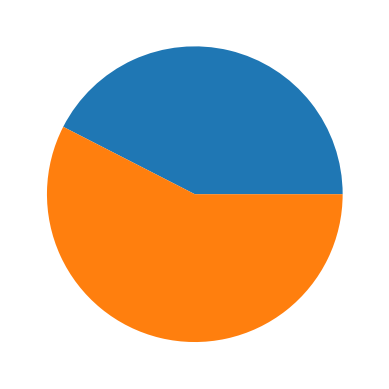

In [ ]:
plt.pie([human_train_dataset.shape[0], other_train_dataset.shape[0]])

We can see that Other Audio dataset is slightly larger than the human voice dataset. But this ratio is acceptable.

<br>
the reason for this is that the model must recognise more better which sounds are NOT humans.

## creating a train-test split

In [ ]:
human_train_dataset.shape[0]

6337

In [ ]:
y_train_human = np.ones(human_train_dataset.shape[0]).reshape(-1, 1)
y_test_human = np.ones(human_test_dataset.shape[0]).reshape(-1, 1)

y_train_human.shape, y_test_human.shape

((6337, 1), (1586, 1))

In [ ]:
y_train_other = np.zeros(other_train_dataset.shape[0]).reshape(-1, 1)
y_test_other = np.zeros(other_test_dataset.shape[0]).reshape(-1, 1)

y_train_other.shape, y_test_other.shape

((8585, 1), (2147, 1))

In [ ]:
#  combine and then shuffle X_train and y_train for human and other variables
X_train = np.vstack((human_train_dataset, other_train_dataset))
y_train = np.vstack((y_train_human, y_train_other))


# Shuffle the datasets
shuffle_indices = np.random.permutation(X_train.shape[0])

X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]

In [ ]:
X_train.shape, y_train.shape

((14922, 40), (14922, 1))

In [ ]:
# combine and then shuffle X_test and y_test for human and other variables
X_test = np.vstack((human_test_dataset, other_test_dataset))
y_test = np.vstack((y_test_human, y_test_other))


# shuffle the datasets
shuffle_indices = np.random.permutation(X_test.shape[0])

X_test = X_test[shuffle_indices]
y_test = y_test[shuffle_indices]


In [ ]:
X_test.shape, y_test.shape

((3733, 40), (3733, 1))

In [ ]:
dataset = {
    "X_train": X_train,
    "y_train": y_train,
    "X_test": X_test,
    "y_test": y_test
}

with open("/content/drive/MyDrive/projects/human-voice-classifier/dataset/final_dataset.pkl", "wb") as f:
  pickle.dump(dataset, f)

We create the training dataset by including all the train test datasets.

Remember that even though we are putting the test dataset in the dataset here, we are not going to use the test data for model training, as this would lead us disadvantaged for checking the model for real world data

# Model training

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pickle

In [ ]:
#  loading the main dataset

with open("/content/drive/MyDrive/projects/human-voice-classifier/dataset/final_dataset.pkl", "rb") as f:
  dataset = pickle.load(f)


X_train = dataset["X_train"]
y_train = dataset["y_train"]
X_test = dataset["X_test"]
y_test = dataset["y_test"]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).squeeze().to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).squeeze().to(device)

In [ ]:
y_train_tensor.shape

torch.Size([14922])

In [ ]:
# Create a DataLoader for easy batching
batch_size = 32
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Define a simple binary classification model
class BinaryClassificationModel(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

In [ ]:
# Initialize model, loss function, and optimizer
input_size = X_train.shape[1]
model = BinaryClassificationModel(input_size).to(device)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
epochs = 100

for epoch in range(epochs):
    model.train()  # Set model to training mode
    for batch_idx, (features, labels) in enumerate(dataloader):
        # Forward pass
        outputs = model(features).squeeze()  # Squeeze to match label dimensions
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

Epoch [1/100], Loss: 0.039594
Epoch [2/100], Loss: 0.032820
Epoch [3/100], Loss: 0.045430
Epoch [4/100], Loss: 0.168613
Epoch [5/100], Loss: 0.001402
Epoch [6/100], Loss: 0.006347
Epoch [7/100], Loss: 0.613144
Epoch [8/100], Loss: 0.000135
Epoch [9/100], Loss: 0.000404
Epoch [10/100], Loss: 0.002238
Epoch [11/100], Loss: 0.000022
Epoch [12/100], Loss: 0.000424
Epoch [13/100], Loss: 0.001716
Epoch [14/100], Loss: 0.000017
Epoch [15/100], Loss: 0.000058
Epoch [16/100], Loss: 0.018475
Epoch [17/100], Loss: 0.001123
Epoch [18/100], Loss: 0.000002
Epoch [19/100], Loss: 0.000152
Epoch [20/100], Loss: 0.000025
Epoch [21/100], Loss: 0.000409
Epoch [22/100], Loss: 0.000209
Epoch [23/100], Loss: 0.000000
Epoch [24/100], Loss: 0.000010
Epoch [25/100], Loss: 0.000004
Epoch [26/100], Loss: 0.005620
Epoch [27/100], Loss: 0.000000
Epoch [28/100], Loss: 0.000232
Epoch [29/100], Loss: 0.000010
Epoch [30/100], Loss: 0.057991
Epoch [31/100], Loss: 0.013478
Epoch [32/100], Loss: 0.000010
Epoch [33/100], L

In [ ]:
# Evaluation
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze()
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9938


**We have achieved 99% accuracy for the model.**

# save the model

In [ ]:
import torch
import os

model_name = "human-voice-classfication-v1.pt"
model_path = os.path.join("/content/drive/MyDrive/projects/human-voice-classifier/model", model_name)

# Convert the model to TorchScript using tracing
example_input = torch.rand(1, input_size).to(device)  # Example input of the correct shape
traced_model = torch.jit.trace(model, example_input)


# Save the TorchScript model
traced_model.save(model_path)
print("Model saved in TorchScript format!")

Model saved in TorchScript format!


# load & testing model

In [ ]:
import torch
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "human-voice-classfication-v1.pt"
model_path = os.path.join("/content/drive/MyDrive/projects/human-voice-classifier/model", model_name)

# Load the TorchScript model
loaded_model = torch.jit.load(model_path, map_location=device)

# Set the model to evaluation mode
loaded_model.eval()

print("TorchScript model loaded successfully!")


TorchScript model loaded successfully!


In [ ]:
import librosa
import numpy as np
from concurrent.futures import ThreadPoolExecutor
import time

def extract_features(file_path, sr=6000, n_mfcc=40, duration=4.0):
    try:
        # Load the audio with a lower sample rate to speed up processing
        audio, original_sr = librosa.load(file_path, sr=sr, duration=duration)

        # Compute MFCCs with fewer coefficients
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

        # Take the mean of each coefficient over time
        mfccs_mean = np.mean(mfccs, axis=1)

        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


# Function to extract features in multithreaded way for a list of audio file paths
def extract_features_multithreaded(audio_paths):
    features = []

    # Use ThreadPoolExecutor to process multiple audio files concurrently
    with ThreadPoolExecutor() as executor:
        # Use executor.map to apply extract_features concurrently to all audio paths
        results = executor.map(extract_features, audio_paths)

        # Collect non-None results
        for result in results:
            if result is not None:
                features.append(result)

    try:
      return np.array(features)
    except Exception as e:
      print(f"exception occured {e}")
      return features

In [ ]:
loaded_model.eval()

RecursiveScriptModule(
  original_name=BinaryClassificationModel
  (fc1): RecursiveScriptModule(original_name=Linear)
  (fc2): RecursiveScriptModule(original_name=Linear)
  (fc3): RecursiveScriptModule(original_name=Linear)
  (fc4): RecursiveScriptModule(original_name=Linear)
  (sigmoid): RecursiveScriptModule(original_name=Sigmoid)
)

# Test model with our sample audio

In [ ]:
import torch
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_name = "human-voice-classfication-v1.pt"
model_path = os.path.join("/content/drive/MyDrive/projects/human-voice-classifier/model", model_name)

# Load the TorchScript model
loaded_model = torch.jit.load(model_path, map_location=device)

# Set the model to evaluation mode
loaded_model.eval()

print("TorchScript model loaded successfully!")


In [ ]:
!pip install pydub


In [ ]:
from pydub import AudioSegment

In [ ]:


# Load the MP3 file
mp3_file_path = '/content/testing/motorcyclecar-crash-rider-falls-down-cliff-and-into-water-271200.mp3'
audio = AudioSegment.from_mp3(mp3_file_path)

# Save the audio as WAV
wav_file_path = '/content/testing/motorcyclecar-crash-rider.wav'
audio.export(wav_file_path, format='wav')

print(f"File converted and saved as {wav_file_path}")


File converted and saved as /content/testing/motorcyclecar-crash-rider.wav


In [ ]:
x = extract_features_multithreaded([os.path.join("testing",i) for i in os.listdir("testing")])
x.shape

<ipython-input-8-931f9ffefe7f>:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, original_sr = librosa.load(file_path, sr=sr, duration=duration)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing testing/.ipynb_checkpoints: [Errno 21] Is a directory: 'testing/.ipynb_checkpoints'


(1, 40)

In [ ]:
!wget "https://www2.cs.uic.edu/~i101/SoundFiles/BabyElephantWalk60.wav" -O "/content/testing/BabyElephantWalk60.wav"

--2024-12-19 13:23:04--  https://www2.cs.uic.edu/~i101/SoundFiles/BabyElephantWalk60.wav
Resolving www2.cs.uic.edu (www2.cs.uic.edu)... 131.193.32.16
Connecting to www2.cs.uic.edu (www2.cs.uic.edu)|131.193.32.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2646044 (2.5M) [audio/x-wav]
Saving to: ‘/content/testing/BabyElephantWalk60.wav’

/content/testing/Ba 100%[===================>]   2.52M  7.41MB/s    in 0.3s    

2024-12-19 13:23:05 (7.41 MB/s) - ‘/content/testing/BabyElephantWalk60.wav’ saved [2646044/2646044]



In [ ]:
%time

x = extract_features("/content/testing/BabyElephantWalk60.wav")

x = loaded_model(torch.tensor(x, dtype=torch.float32).to(device)).squeeze()

y_pred = (x > 0.5).float()
y_pred

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs


tensor(0.)

**the model has correctly Identified the elephant sound as non-human, and took just 8 miliseconds in the process**